In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# data load
train_df = pd.read_csv('./FIFA_train.csv')
test_df = pd.read_csv('./FIFA_test.csv')
train_df.head()
test_df.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1,Cristiano Ronaldo,33,europe,2022,ST,right,5.0,94,94,5.0
1,2,Neymar Jr,26,south america,2022,ST,right,5.0,92,93,5.0
2,4,K. De Bruyne,27,europe,2023,MF,right,4.0,91,92,4.0
3,5,E. Hazard,27,europe,2020,ST,right,4.0,91,91,4.0
4,6,L. Modrić,32,europe,2020,MF,right,4.0,91,91,4.0


In [3]:
# 데이터 확인 결과 null값이 존재 하지 않고, 데이터 개수가 모두 같다
# object값으로 되어있는 column들이 많다
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [4]:
# 아이디 값과 이름은 불필요한 feature로 판단 된다
# 우선 수치형 데이터로 변환하는게 우선인거 같다, 숫자형식으로 되어있는데 object형태인 것들
train_df.describe()

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
count,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8.932000e+03
mean,7966.775750,25.209136,1.130878,67.091133,71.997201,2.401702,2.778673e+06
std,4844.428521,4.635515,0.423792,6.854910,5.988147,0.776048,5.840982e+06
min,0.000000,16.000000,1.000000,47.000000,48.000000,1.000000,1.000000e+04
25%,3751.750000,21.000000,1.000000,63.000000,68.000000,2.000000,3.750000e+05
50%,7696.500000,25.000000,1.000000,67.000000,72.000000,2.000000,8.250000e+05
75%,12082.250000,28.000000,1.000000,72.000000,76.000000,3.000000,2.600000e+06
max,16948.000000,40.000000,5.000000,94.000000,94.000000,5.000000,1.105000e+08


## 전처리

In [5]:
# test와 train모두 id와 name컬럼을 삭제 해 준다.
train_df.drop(['id','name'], axis = 1, inplace = True)
test_df.drop(['id','name'], axis = 1, inplace = True)

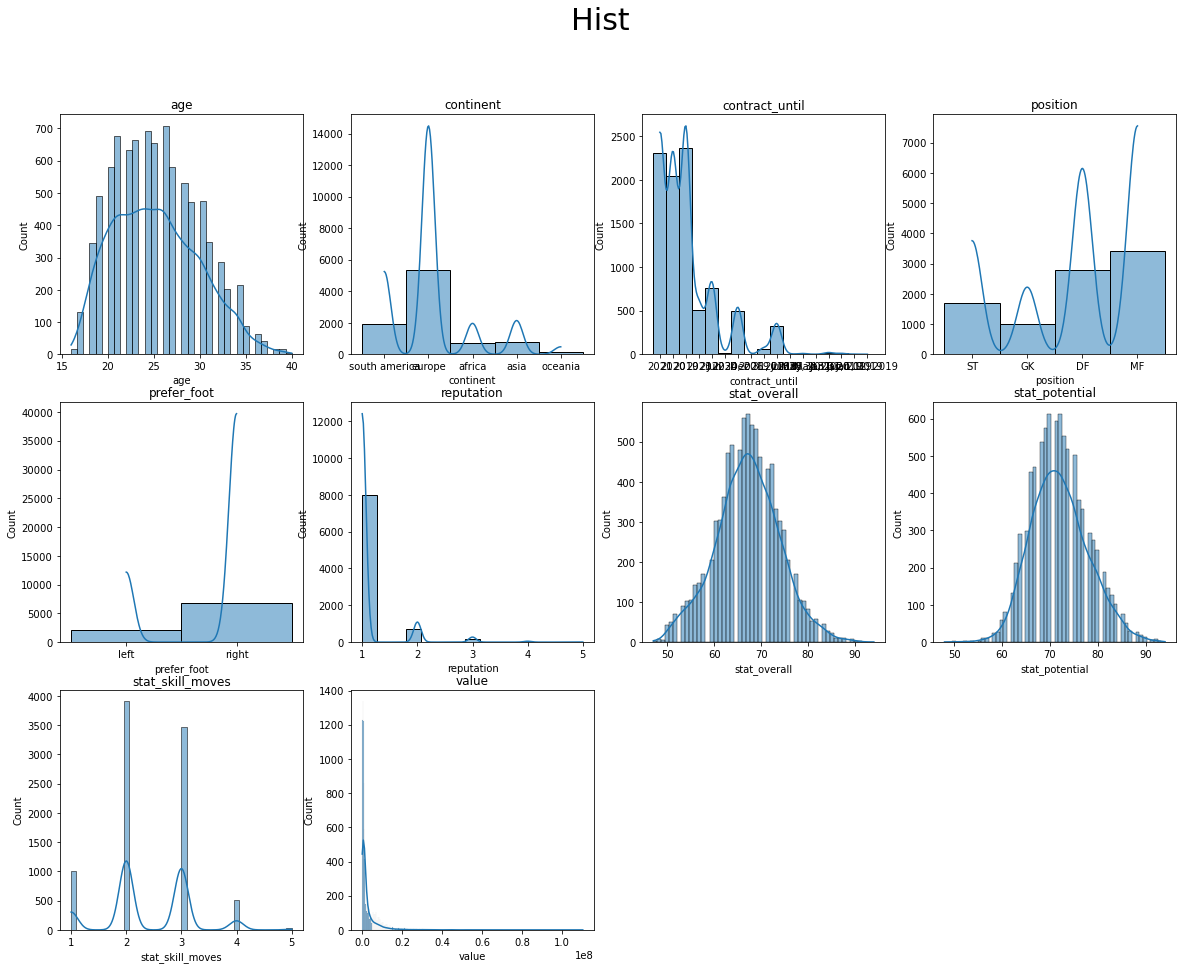

In [6]:
# feature와 label 모두 분포도 확인

plt.figure(figsize = (20,15))
plt.suptitle("Hist", fontsize = 30)

for i in range(len(train_df.columns)):
    plt.subplot(3,4,i+1)
    plt.title(train_df.columns[i])
    sns.histplot(train_df[train_df.columns[i]], kde = True)

#### Insight

1) 나이는 20세에서 27세가 가장 많고 30세 부터는 수치가 점점 더 크게 줄어든다

2) 모든 출신 대륙의 합보다 유럽 출신 선수의 수가 더 많다

3) 남은 계약기간이 2021,2020,2019인 선수들이 대부분이다


4) 포지션은 4가지 카테고리이며 MF의 숫자가 가장 많지만 GK가 축구에서 필요한 인원 비율보다 많다

5) 선호하는 발은 오른발이 왼발의 3배 이상이다.

6) 유명한 정도는 1이 가장 크고 5로 갈수록 큰 포그오 줄어 든다

7) 선수 능력치는 70을 중앙 값으로 내려가는 수치를 가지고 있다

8) potential 또한 선수의 현재 능력치와 비슷한 값을 보여준다

9) 기술 능력치는 2와 3의 값이 가장 높고 그 다음인 1은 2의 25%정도, 5는 거의 없는 수준이다.

['continent', 'contract_until', 'position', 'prefer_foot']


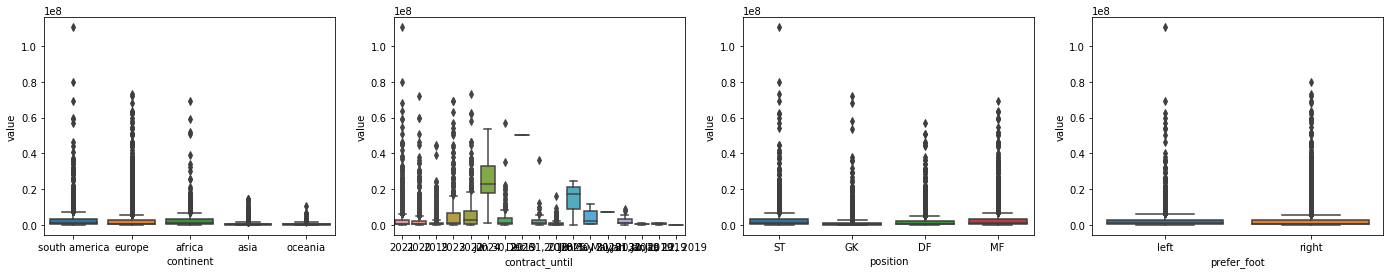

In [7]:
# 대륙별 출신 선수의 선수 계약기간, 선수 포지션, 선수의 주발을 그래프로 시각화
fig, ax = plt.subplots(1, 4, figsize = (24,4))
ax = ax.flatten()
col_list = ['continent', 'contract_until', 'position', 'prefer_foot']
print(col_list)

for i in range(len(col_list)):
    sns.boxplot(data = train_df, x = col_list[i], y = 'value', ax = ax[i])
plt.show()

#### Insight
- continent에서 south america와 africa의 이상치가 보입니다. 처리가 필요하고, 이상치를 제거하면 europe의 가치가 가장 크다
- contract_until은 이상치도 보이고 연도 처리도 필요합니다.
- position도 이상치 제거가 필요해 보인다
- preger_foot은  right의 count가 위그래프를 통해 3배이상 많다는걸 알수 있다. 하지만 value에서는 큰 차이가 보이지 않는다
- 전체적으로 선수의 가치가 특정 선수들에게 훨씬 더 크게 적용됨으로 이상치를 어떻게 처리하는가가 관건인 것으로 보인다.

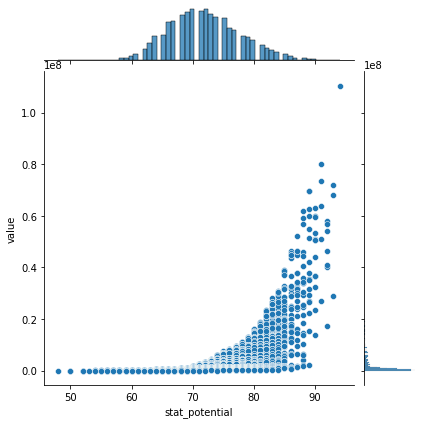

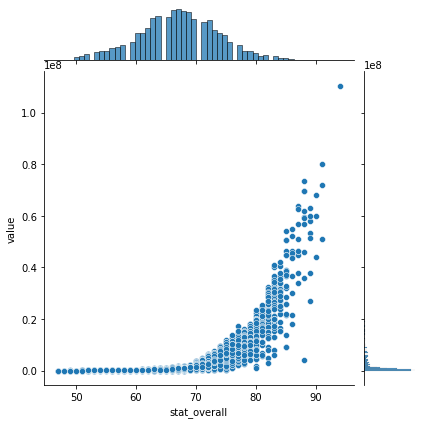

In [8]:
col_list = ['age', 'reputation', 'stat_skill_moves']
sns.jointplot(data = train_df, x = 'stat_potential', y = 'value')
sns.jointplot(data = train_df, x = 'stat_overall', y = 'value')
plt.show()

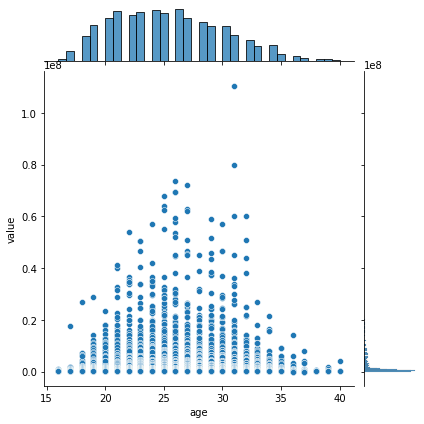

In [9]:
sns.jointplot(x = 'age', y = 'value', data = train_df)

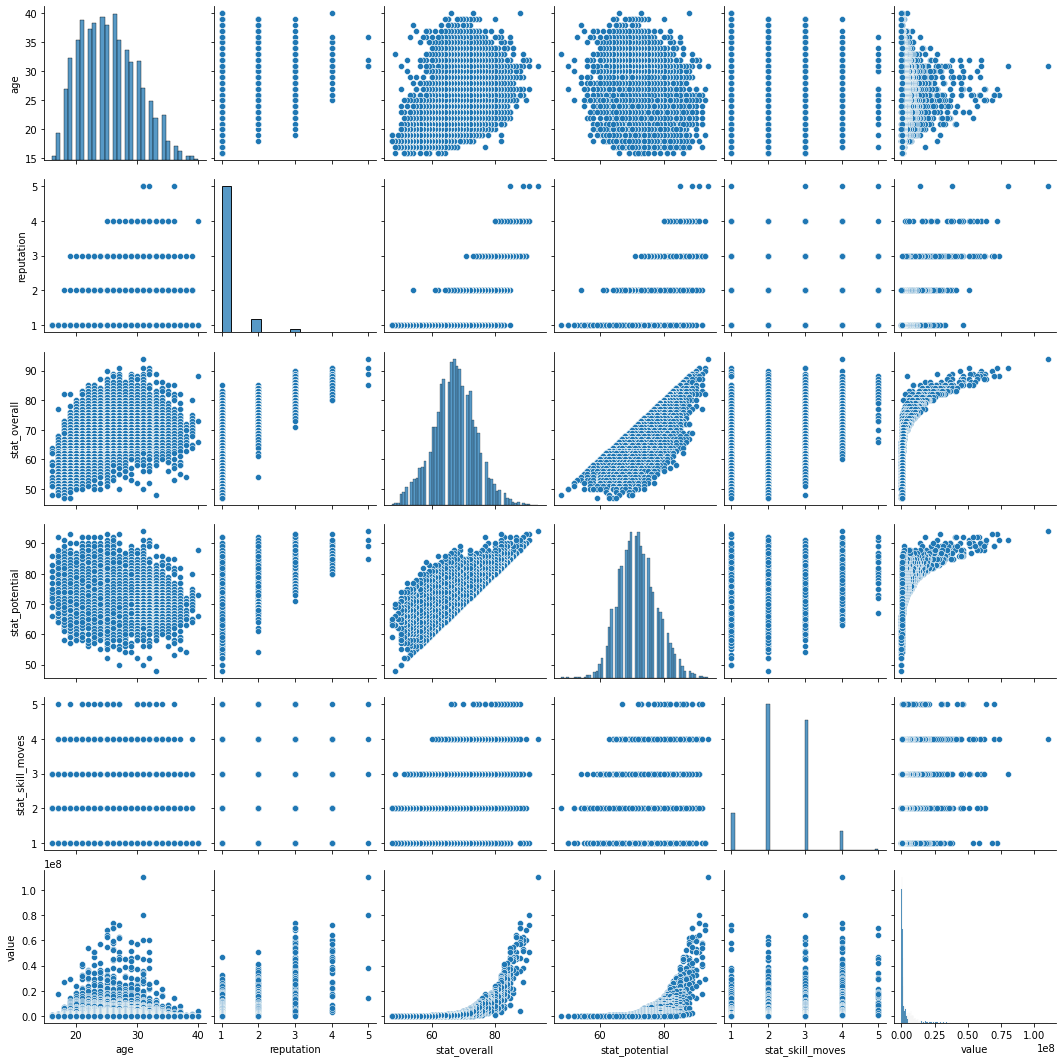

In [10]:
sns.pairplot(train_df, palette = 'dark')
plt.show()

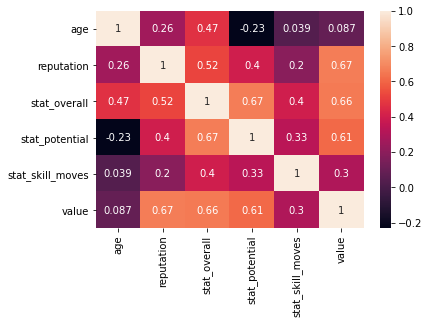

In [11]:
sns.heatmap(train_df.corr(), annot = True)
plt.show()

#### Insight
- 나이의 경우 value와 관계가 없다고 표시 되지만 실제를 반영했을때는 꼭 필요한 요소이라고 생각합니다
- 예상보다 reputation, stat_overall, stat_potential 각각 value와의 관계가 낮다

#### 결론
- value와 상관관계가 비교적 높은 것은
> - reputation
> - stat_overall
> - stat_potential
- 상관관계가 낮은 것
> - age
> - prefer_foot
> - contract_until
> - position
#### 추가적으로 진행해야 하는 작업
1. 'continent', 'contract_until', 'position', 'prefer_foot'의 이상치 제거(IQR?특정범위?)
2. value값 로그변환
3. contract_until 형식 통일
4. Target Encoding (get_dummies)
5. feature_selection (wrapper?, embed?)
6. 형변환(scaling)

1) 'continent', 'contract_until', 'position', 'prefer_foot'의 이상치 제거(IQR?특정범위?)

['continent', 'contract_until', 'position', 'prefer_foot']


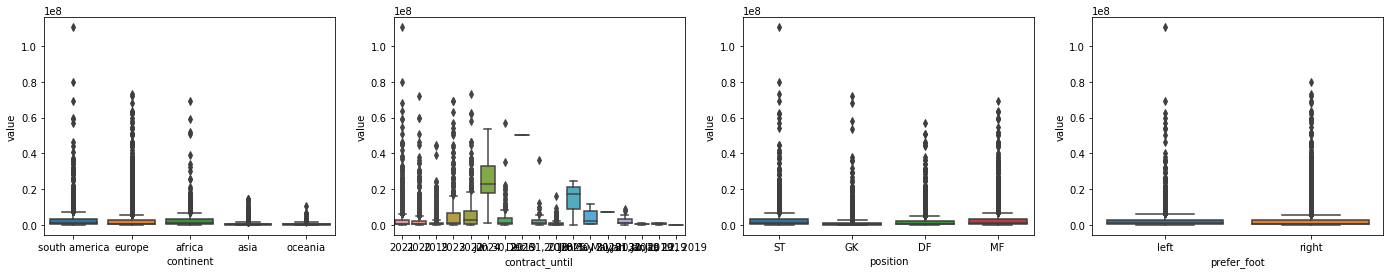

In [12]:
# 대륙별 출신 선수의 선수 계약기간, 선수 포지션, 선수의 주발을 그래프로 시각화
fig, ax = plt.subplots(1, 4, figsize = (24,4))
ax = ax.flatten()
col_list = ['continent', 'contract_until', 'position', 'prefer_foot']
print(col_list)

for i in range(len(col_list)):
    sns.boxplot(data = train_df, x = col_list[i], y = 'value', ax = ax[i])
plt.show()

In [13]:
train_df.loc[train_df['value']> 1.0e+08]

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0


In [14]:
# 이상치를 처리하던 중 이상치의 선수가 메시 선수인걸 확인할 수 있었습니다. 
# 예외적으로 월등히 높은 값을 가지고 있어 다른 선수들의 예측에 피해가 갈 수 있어 drop합니다
train_df.drop([0], inplace = True)
train_df.head()

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
1,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
5,32,south america,2019,DF,right,3.0,90,90,2.0,44000000.0


In [15]:
# 1번과 4번 선수 또한 메시와 같은 예외인 선수 이므로 제외합니다.
gk = train_df.loc[train_df['position']=='GK']
gk.loc[gk['value']>0.5e+08]

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
1,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
4,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
8,26,europe,2022,GK,right,3.0,89,92,1.0,58000000.0
9,26,europe,2024,GK,left,4.0,89,90,1.0,53500000.0


In [16]:
train_df.drop([1, 4, 8, 9], inplace = True)
train_df.head()

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
2,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
5,32,south america,2019,DF,right,3.0,90,90,2.0,44000000.0
6,32,europe,2020,MF,left,4.0,90,90,4.0,60000000.0
7,27,europe,2023,MF,right,3.0,89,90,2.0,63000000.0


['continent', 'contract_until', 'position', 'prefer_foot']


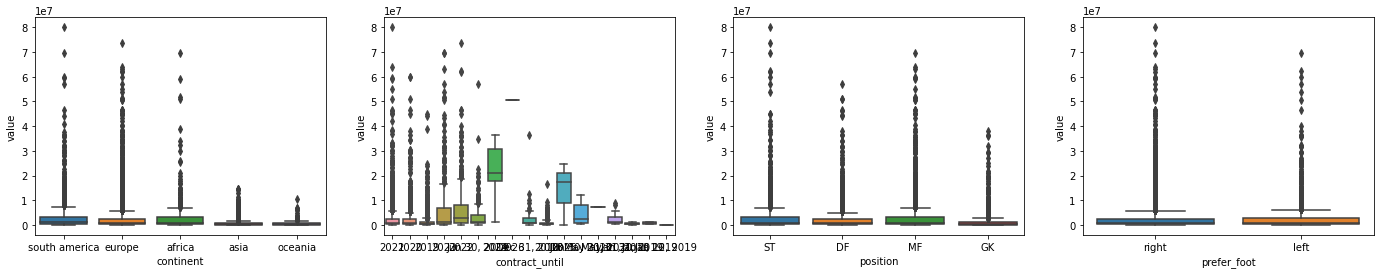

In [17]:
# 대륙별 출신 선수의 선수 계약기간, 선수 포지션, 선수의 주발을 그래프로 시각화
fig, ax = plt.subplots(1, 4, figsize = (24,4))
ax = ax.flatten()
col_list = ['continent', 'contract_until', 'position', 'prefer_foot']
print(col_list)

for i in range(len(col_list)):
    sns.boxplot(data = train_df, x = col_list[i], y = 'value', ax = ax[i])
plt.show()

2) Label값 value에 대해 log1p변환

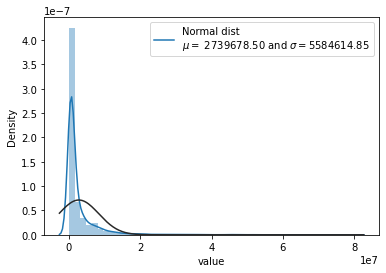

In [18]:
import seaborn as sns
from scipy.stats import norm, skew

# label 값이 심하게 왼쪽으로 치우쳐져 있다
sns.distplot(train_df.value, fit = norm)
(mu, sigma) = norm.fit(train_df['value'])
plt.legend(['Normal dist\n$\mu = $ {:.2f} and $\sigma = ${:.2f}'.format(mu, sigma)],loc = 'best')
plt.show()

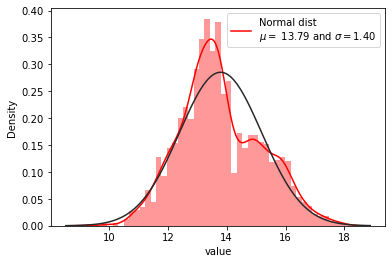

In [19]:
# log1p변환을 한 결과를 위와 비슷한 방식으로 확인한다.
# 정규분포가 만들어 졌으므로 이렇게 예측을 진행한다.
sns.distplot(np.log1p(train_df.value), fit = norm, color = 'r')
(mu, sigma) = norm.fit(np.log1p(train_df['value']))
plt.legend(['Normal dist\n$\mu = $ {:.2f} and $\sigma = ${:.2f}'.format(mu, sigma)],loc = 'best')
plt.show()

In [20]:
# 정규분포가 처럼 만들기 위해 log1p를 적용한다
train_df.value = np.log1p(train_df.value)

3) contract_until 

In [21]:
# 여러가지 처리방법이 존재하지만 대부분 연도값을 가지고 있어, 연도값으로 통일을 해준다.
train_df['contract_until'].value_counts()

2019            2366
2021            2306
2020            2040
2022             760
2023             506
Jun 30, 2019     501
2018             327
Dec 31, 2018      64
May 31, 2019      19
2024              11
Jan 31, 2019      10
Jun 30, 2020       9
2025               3
Jan 1, 2019        2
2026               1
Jan 12, 2019       1
May 31, 2020       1
Name: contract_until, dtype: int64

In [22]:
train_df['contract_until'] = train_df['contract_until'].apply(lambda x:x[-4:])
train_df['contract_until'].value_counts()

2019    2899
2021    2306
2020    2050
2022     760
2023     506
2018     391
2024      11
2025       3
2026       1
Name: contract_until, dtype: int64

In [23]:
test_df['contract_until'] = test_df['contract_until'].apply(lambda x:x[-4:])
test_df['contract_until'].value_counts()

2019    1171
2021     985
2020     887
2022     338
2023     251
2018     189
2025       4
2024       2
2026       1
Name: contract_until, dtype: int64

4) object형 변환

In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8927 entries, 2 to 8931
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               8927 non-null   int64  
 1   continent         8927 non-null   object 
 2   contract_until    8927 non-null   object 
 3   position          8927 non-null   object 
 4   prefer_foot       8927 non-null   object 
 5   reputation        8927 non-null   float64
 6   stat_overall      8927 non-null   int64  
 7   stat_potential    8927 non-null   int64  
 8   stat_skill_moves  8927 non-null   float64
 9   value             8927 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 1.1+ MB


In [25]:
# object형을 get_dummies로 원-핫 인코딩 처리를 해주었다. (어차피 트리계열 regressor를 사용할 예정이기 때문에 feature의 길이는 큰상관이 없다.)
train_df_one = pd.get_dummies(train_df)
test_df_one = pd.get_dummies(test_df)
print('get_dummies() 수행 전 데이터 Shape:', train_df.shape)
print('get_dummies() 수행 후 데이터 Shape:', train_df_one.shape)
print('get_dummies() 수행 전 데이터 Shape:', test_df.shape)
print('get_dummies() 수행 후 데이터 Shape:', test_df_one.shape)

get_dummies() 수행 전 데이터 Shape: (8927, 10)
get_dummies() 수행 후 데이터 Shape: (8927, 26)
get_dummies() 수행 전 데이터 Shape: (3828, 9)
get_dummies() 수행 후 데이터 Shape: (3828, 25)


In [26]:
train_df_one.head(5).T

,2,3,5,6,7
age,31.000000,32.000000,32.0000,32.000000,27.000000
reputation,5.000000,4.000000,3.0000,4.000000,3.000000
stat_overall,91.000000,91.000000,90.0000,90.000000,89.000000
stat_potential,91.000000,91.000000,90.0000,90.000000,90.000000
stat_skill_moves,3.000000,3.000000,2.0000,4.000000,2.000000
value,18.197537,17.747336,17.5997,17.909855,17.958645
continent_africa,0.000000,0.000000,0.0000,0.000000,0.000000
continent_asia,0.000000,0.000000,0.0000,0.000000,0.000000
continent_europe,0.000000,1.000000,0.0000,1.000000,1.000000
continent_oceania,0.000000,0.000000,0.0000,0.000000,0.000000


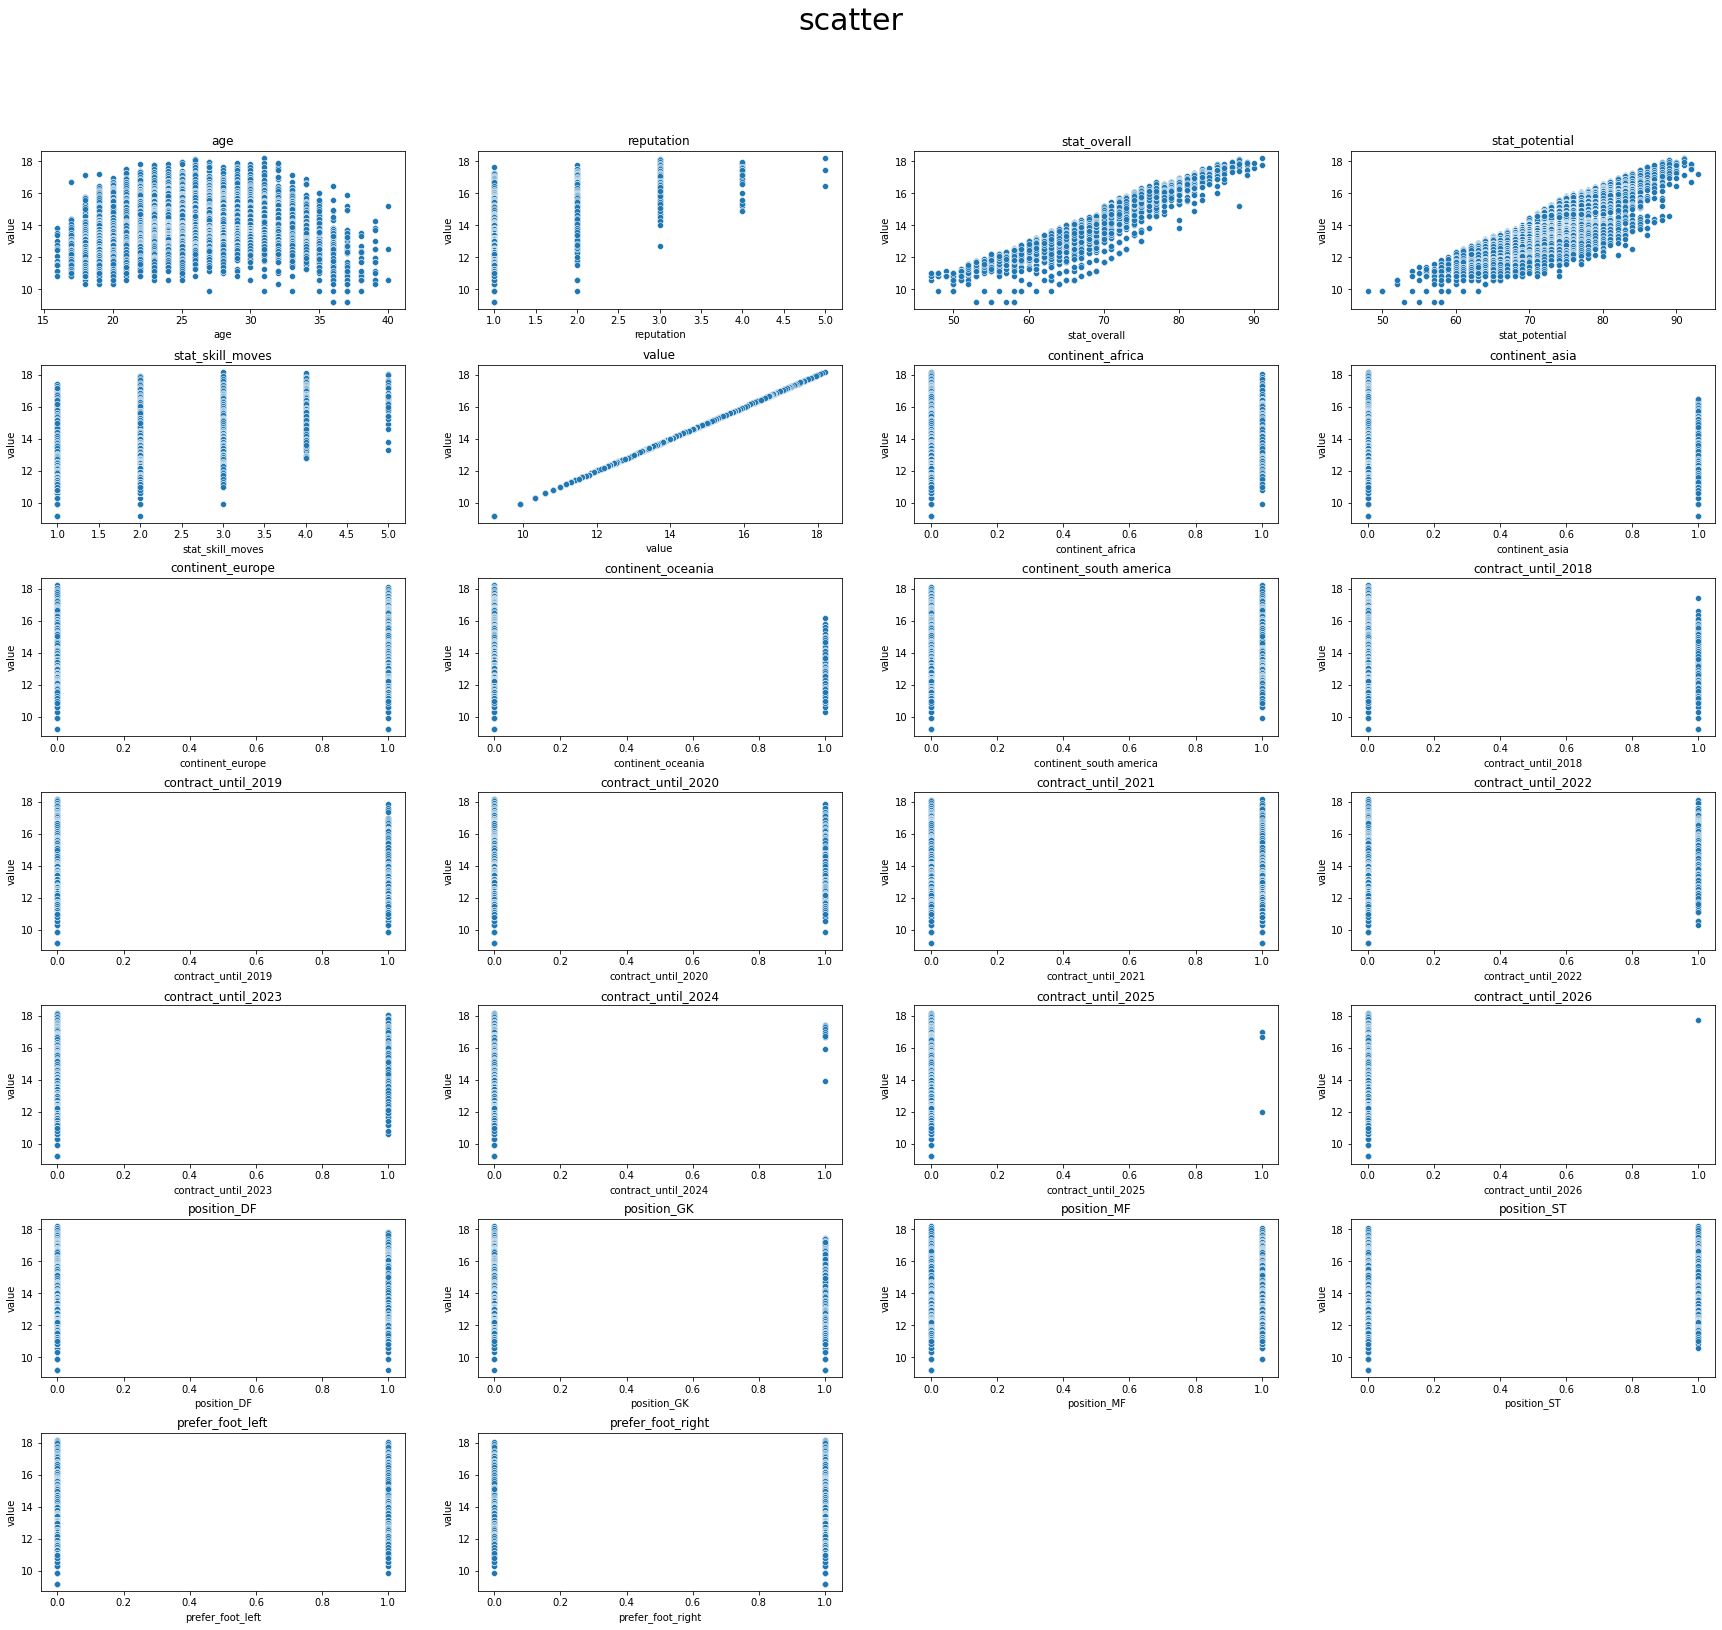

In [27]:
# 정확히 나눠진것을 확인합니다

plt.figure(figsize = (30,25))
plt.suptitle("scatter", fontsize = 30)
plt.subplots_adjust(left = 0.125, bottom = 0.1, right = 0.9, 
                    top = 0.9, wspace = 0.2, hspace = 0.35)

for i in range(len(train_df_one.columns)):
    plt.subplot(7,4,i+1)
    plt.title(train_df_one.columns[i])
    sns.scatterplot(x = train_df_one[train_df_one.columns[i]], y = train_df_one['value'])

<AxesSubplot:>

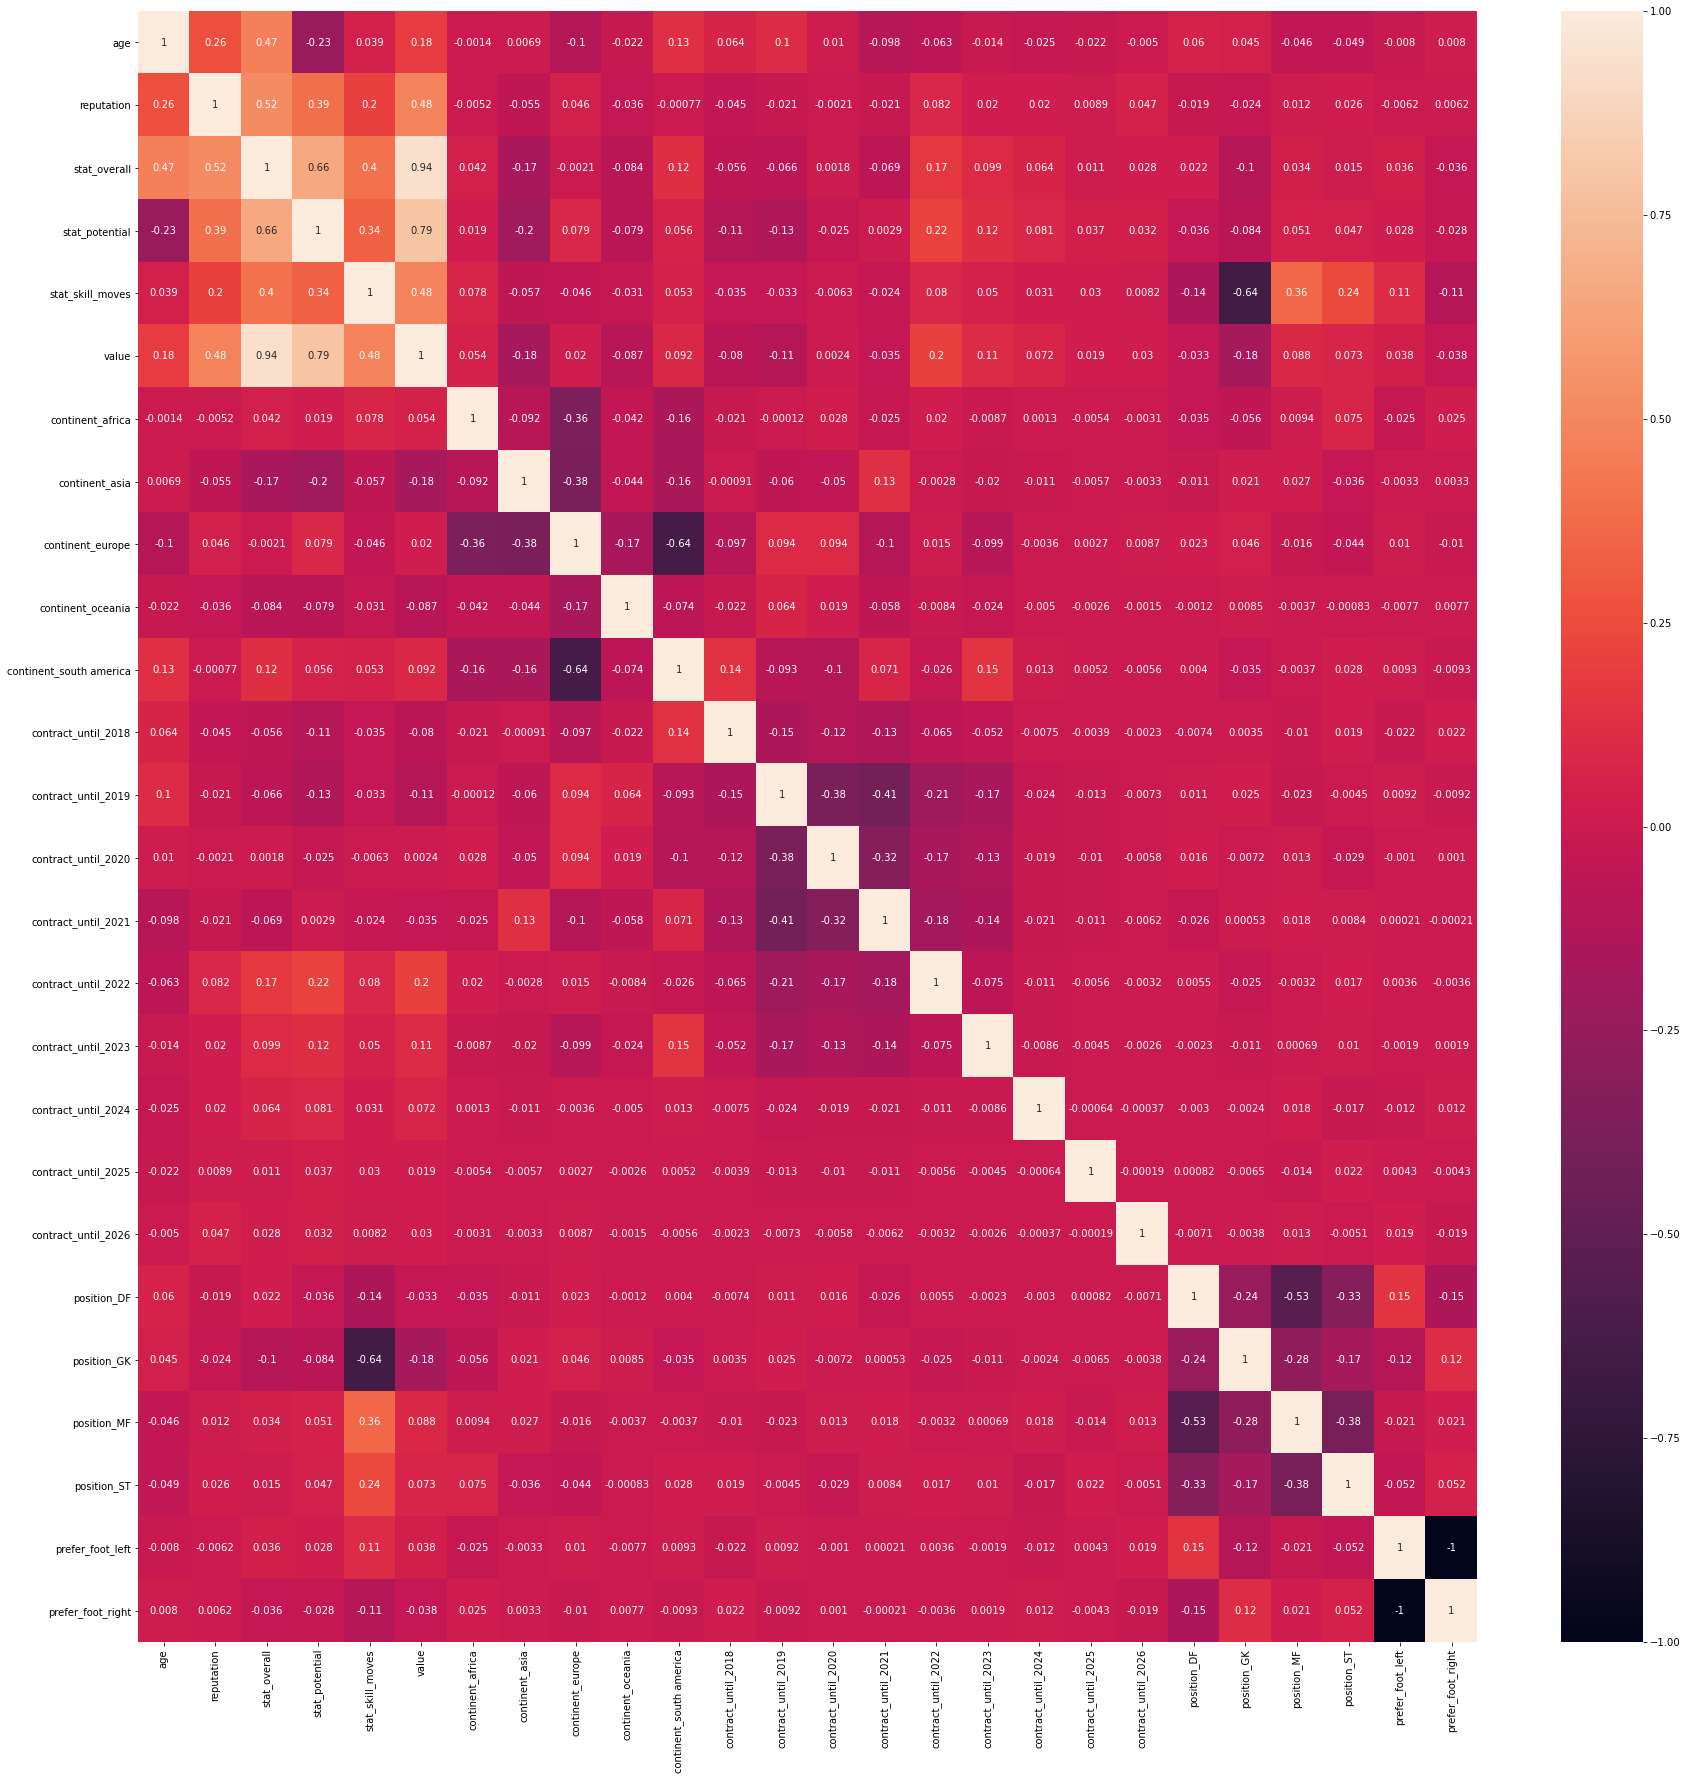

In [28]:
plt.figure(figsize = (30,30))
sns.heatmap(train_df_one.corr(),annot = True)

5) 왜도가 높은 컬럼 로그 변환 / Scaling

In [29]:
X = train_df_one.drop('value', axis = 1)
y = train_df_one.value


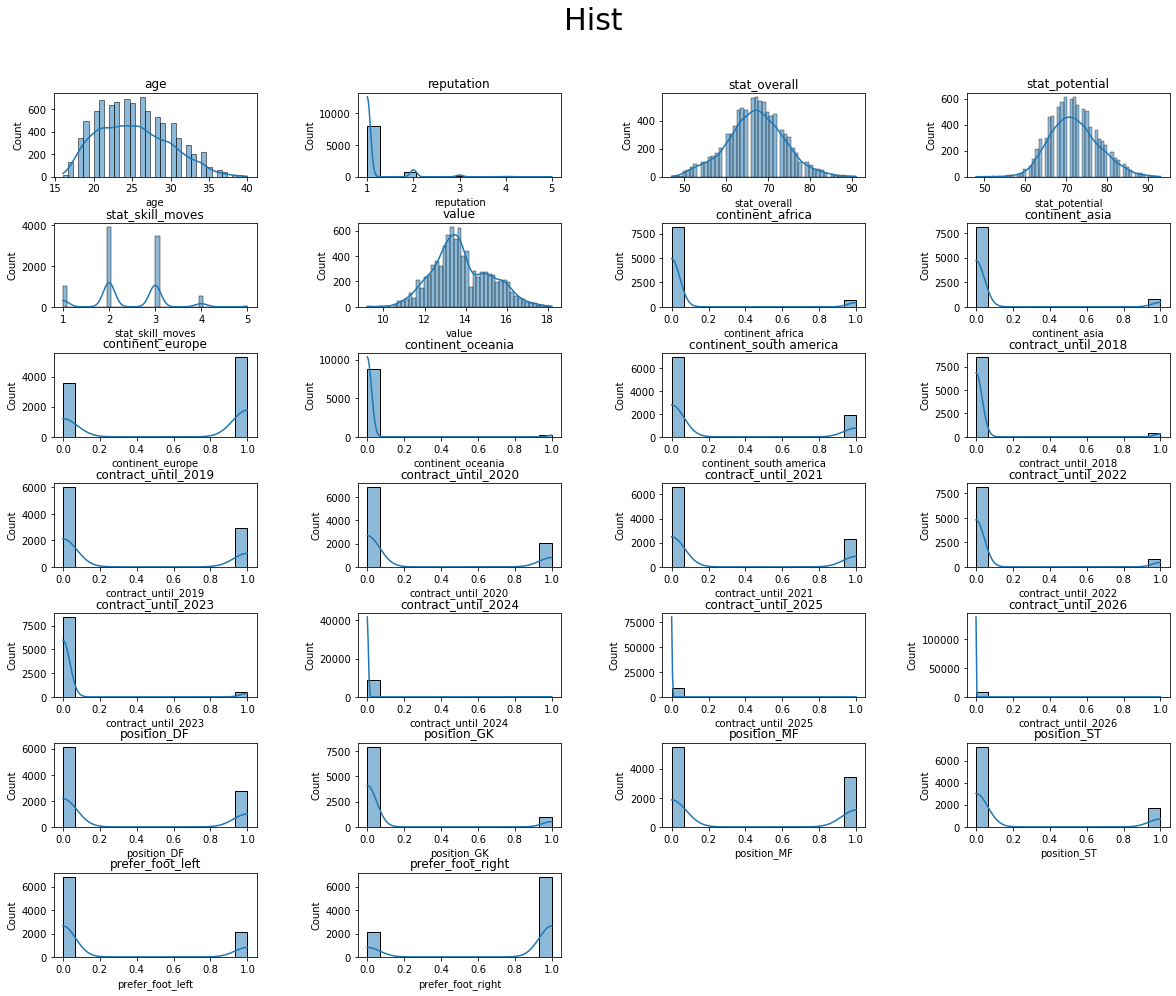

In [30]:
# feature와 label 모두 분포도 확인

plt.figure(figsize = (20,15))
plt.suptitle("Hist", fontsize = 30)
plt.subplots_adjust(left = 0.125, bottom = 0.1, right = 0.9, 
                    top = 0.9, wspace = 0.5, hspace = 0.55)

for i in range(len(train_df_one.columns)):
    plt.subplot(7,4,i+1)
    plt.title(train_df_one.columns[i])
    sns.histplot(train_df_one[train_df_one.columns[i]], kde = True)

In [31]:
# 분포가 치우쳐진 값들에 대해 log1p 변환을 해준다
X[['age', 'reputation', 'stat_skill_moves']] = np.log1p(X[['age','reputation', 'stat_skill_moves']])
test_df_one[['age', 'reputation', 'stat_skill_moves']] = np.log1p(test_df_one[['age', 'reputation', 'stat_skill_moves']])

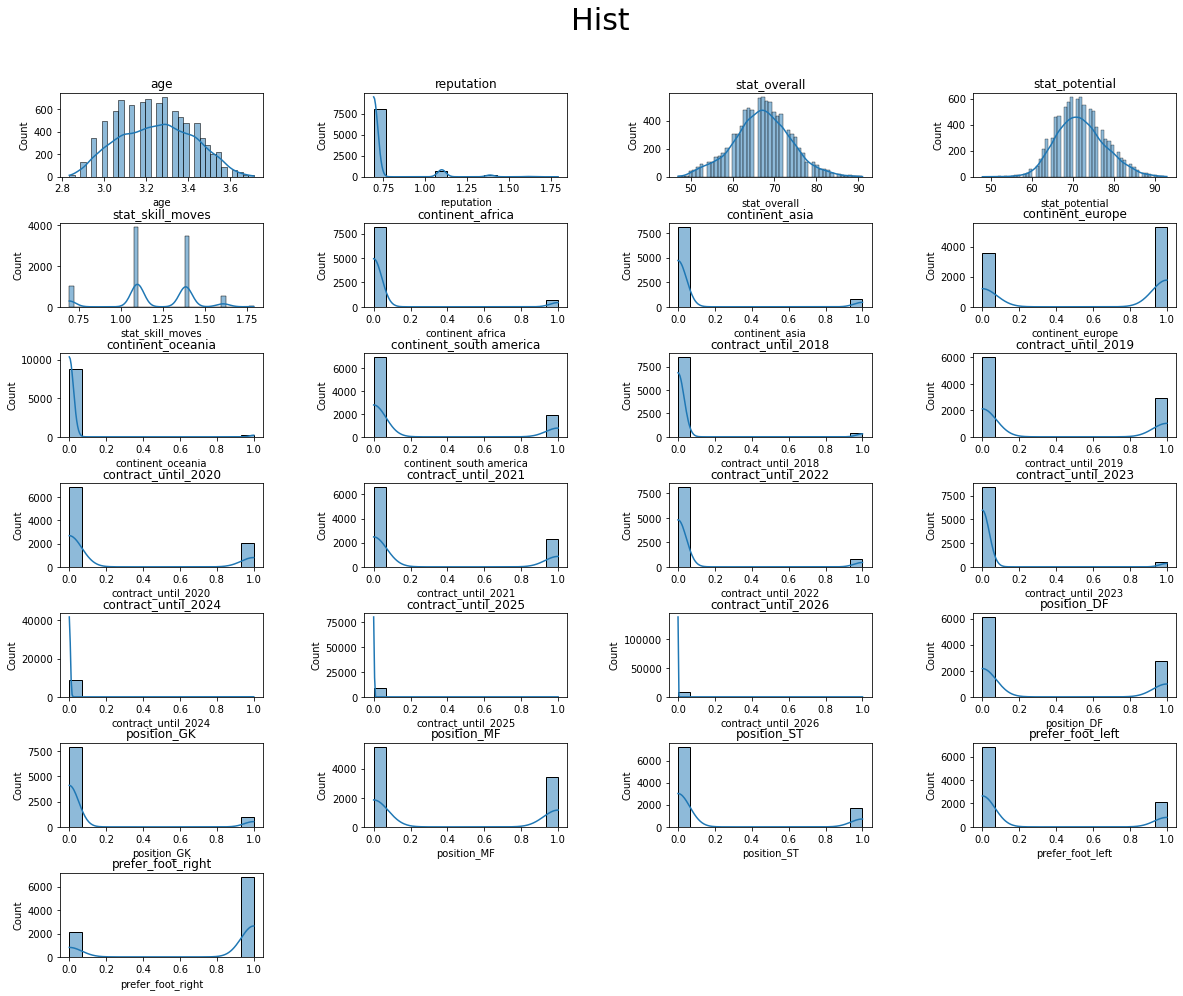

In [32]:
# feature와 label 모두 분포도 확인

plt.figure(figsize = (20,15))
plt.suptitle("Hist", fontsize = 30)
plt.subplots_adjust(left = 0.125, bottom = 0.1, right = 0.9, 
                    top = 0.9, wspace = 0.5, hspace = 0.55)

for i in range(len(X.columns)):
    plt.subplot(7,4,i+1)
    plt.title(X.columns[i])
    sns.histplot(X[X.columns[i]], kde = True)

In [33]:
# scaling을 한다
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [34]:
test_df_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3828 entries, 0 to 3827
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      3828 non-null   float64
 1   reputation               3828 non-null   float64
 2   stat_overall             3828 non-null   int64  
 3   stat_potential           3828 non-null   int64  
 4   stat_skill_moves         3828 non-null   float64
 5   continent_africa         3828 non-null   uint8  
 6   continent_asia           3828 non-null   uint8  
 7   continent_europe         3828 non-null   uint8  
 8   continent_oceania        3828 non-null   uint8  
 9   continent_south america  3828 non-null   uint8  
 10  contract_until_2018      3828 non-null   uint8  
 11  contract_until_2019      3828 non-null   uint8  
 12  contract_until_2020      3828 non-null   uint8  
 13  contract_until_2021      3828 non-null   uint8  
 14  contract_until_2022     

In [35]:
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
test_df_one = pd.DataFrame(scaler.fit_transform(test_df_one), columns = test_df_one.columns)

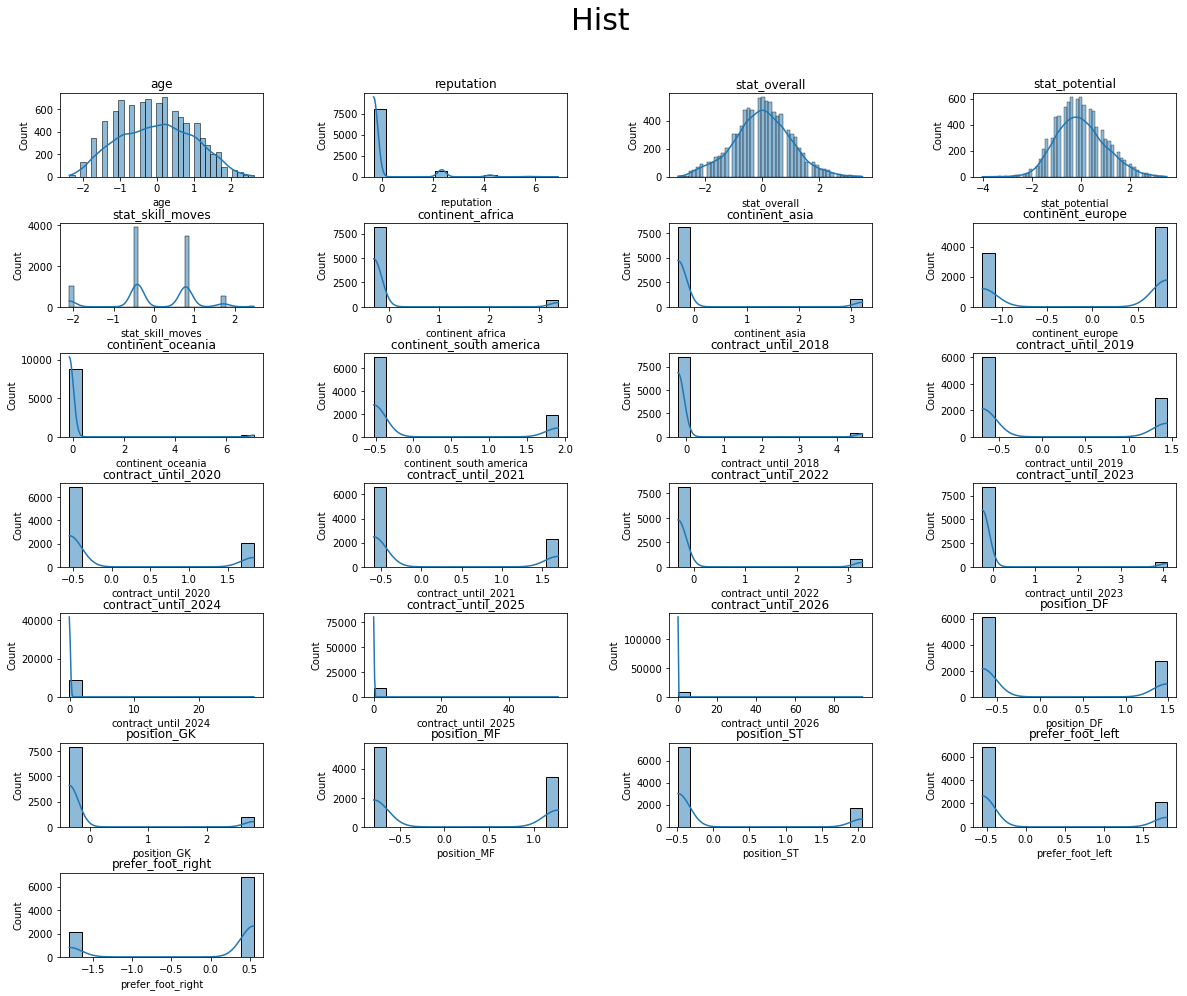

In [36]:
# feature와 label 모두 분포도 확인

plt.figure(figsize = (20,15))
plt.suptitle("Hist", fontsize = 30)
plt.subplots_adjust(left = 0.125, bottom = 0.1, right = 0.9, 
                    top = 0.9, wspace = 0.5, hspace = 0.55)

for i in range(len(X.columns)):
    plt.subplot(7,4,i+1)
    plt.title(X.columns[i])
    sns.histplot(X[X.columns[i]], kde = True)

5) feature selection (filter, Wrapper, Embed)
- 위 상관관계의 다중공선성을 따져보면 prefer_foot_left와 right의 상관관계가 1이으로 둘을 drop하고
- value와 stat_overall의 상관 관계가 0.94로 매우 높지만 현실적이므로 먼저 예측을 진행하고 추후 문제가 생길시 다시 작업을 할 예정이다


In [37]:
train_df_one.describe().T.sort_values(by = 'std')

,count,mean,std,min,25%,50%,75%,max
contract_until_2026,8927.0,0.000112,0.010584,0.00000,0.000000,0.00000,0.000000,1.000000
contract_until_2025,8927.0,0.000336,0.018330,0.00000,0.000000,0.00000,0.000000,1.000000
contract_until_2024,8927.0,0.001232,0.035083,0.00000,0.000000,0.00000,0.000000,1.000000
continent_oceania,8927.0,0.019603,0.138641,0.00000,0.000000,0.00000,0.000000,1.000000
contract_until_2018,8927.0,0.043800,0.204661,0.00000,0.000000,0.00000,0.000000,1.000000
contract_until_2023,8927.0,0.056682,0.231247,0.00000,0.000000,0.00000,0.000000,1.000000
continent_africa,8927.0,0.080766,0.272491,0.00000,0.000000,0.00000,0.000000,1.000000
contract_until_2022,8927.0,0.085135,0.279098,0.00000,0.000000,0.00000,0.000000,1.000000
continent_asia,8927.0,0.088160,0.283543,0.00000,0.000000,0.00000,0.000000,1.000000
position_GK,8927.0,0.112468,0.315959,0.00000,0.000000,0.00000,0.000000,1.000000


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

model.feature_importances_

## Modeling

### 1. NGBRegressor

In [42]:
#pip install bayesian-optimization
#pip install mlxtend
#pip install ngboost
#pip install catboost

In [43]:
#pip install catboost

In [39]:
# modeling package
from bayes_opt import BayesianOptimization
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from ngboost import NGBRegressor
from catboost import CatBoostRegressor

In [40]:
ngb = NGBRegressor(random_state = 2022)

In [41]:
cv_ngb = cross_val_score(ngb, X, y, cv = KFold(n_splits = 4, random_state = 1011, shuffle = True), scoring = 'neg_mean_squared_error')
cv_ngb.mean()

[iter 0] loss=1.7600 val_loss=0.0000 scale=1.0000 norm=1.2909
[iter 100] loss=0.8016 val_loss=0.0000 scale=2.0000 norm=1.1332
[iter 200] loss=-0.0703 val_loss=0.0000 scale=2.0000 norm=0.9263
[iter 300] loss=-0.7490 val_loss=0.0000 scale=2.0000 norm=0.8167
[iter 400] loss=-1.0783 val_loss=0.0000 scale=2.0000 norm=0.8431
[iter 0] loss=1.7474 val_loss=0.0000 scale=1.0000 norm=1.2766
[iter 100] loss=0.7816 val_loss=0.0000 scale=2.0000 norm=1.1241
[iter 200] loss=-0.0859 val_loss=0.0000 scale=2.0000 norm=0.9228
[iter 300] loss=-0.7551 val_loss=0.0000 scale=2.0000 norm=0.8083
[iter 400] loss=-1.0745 val_loss=0.0000 scale=2.0000 norm=0.8386
[iter 0] loss=1.7521 val_loss=0.0000 scale=1.0000 norm=1.2814
[iter 100] loss=0.7517 val_loss=0.0000 scale=2.0000 norm=1.1100
[iter 200] loss=-0.1132 val_loss=0.0000 scale=2.0000 norm=0.9188
[iter 300] loss=-0.7760 val_loss=0.0000 scale=2.0000 norm=0.8106
[iter 400] loss=-1.0919 val_loss=0.0000 scale=1.0000 norm=0.4221
[iter 0] loss=1.7573 val_loss=0.0000 

-0.008582083079154978

In [44]:
ngb.fit(X, y)

[iter 0] loss=1.7542 val_loss=0.0000 scale=1.0000 norm=1.2841
[iter 100] loss=0.7867 val_loss=0.0000 scale=2.0000 norm=1.1264
[iter 200] loss=-0.0808 val_loss=0.0000 scale=2.0000 norm=0.9242
[iter 300] loss=-0.7524 val_loss=0.0000 scale=2.0000 norm=0.8166
[iter 400] loss=-1.0817 val_loss=0.0000 scale=2.0000 norm=0.8446


NGBRegressor(random_state=RandomState(MT19937) at 0x1B741E38640)

In [46]:
# log1p변환을 풀어서 예측하여야 한다
pred_ngb = np.expm1(ngb.predict(test_df_one))

### 2. CatBoostRegressor

In [47]:
param = {'depth' : [2,3,4,5,6,7,8,9,10], 
         'learning_rate' : [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.25]}

In [48]:
grid_cat = GridSearchCV(CatBoostRegressor(random_state = 1011), param, 
                        cv = KFold(n_splits = 4, 
                                   shuffle = True, 
                                   random_state = 1011), 
                        scoring = 'neg_mean_squared_error', 
                        n_jobs = -1)

In [49]:
grid_cat.fit(X, y)

0:	learn: 1.2855461	total: 134ms	remaining: 2m 14s
1:	learn: 1.1789542	total: 136ms	remaining: 1m 8s
2:	learn: 1.0844199	total: 138ms	remaining: 46s
3:	learn: 0.9996127	total: 140ms	remaining: 34.9s
4:	learn: 0.9219091	total: 142ms	remaining: 28.3s
5:	learn: 0.8513663	total: 144ms	remaining: 23.9s
6:	learn: 0.7883880	total: 146ms	remaining: 20.7s
7:	learn: 0.7313550	total: 148ms	remaining: 18.4s
8:	learn: 0.6785145	total: 150ms	remaining: 16.5s
9:	learn: 0.6300991	total: 152ms	remaining: 15s
10:	learn: 0.5887402	total: 154ms	remaining: 13.8s
11:	learn: 0.5492992	total: 155ms	remaining: 12.8s
12:	learn: 0.5133790	total: 158ms	remaining: 12s
13:	learn: 0.4801533	total: 160ms	remaining: 11.2s
14:	learn: 0.4510825	total: 161ms	remaining: 10.6s
15:	learn: 0.4232568	total: 163ms	remaining: 10s
16:	learn: 0.3967751	total: 165ms	remaining: 9.52s
17:	learn: 0.3743421	total: 166ms	remaining: 9.07s
18:	learn: 0.3542731	total: 168ms	remaining: 8.67s
19:	learn: 0.3345162	total: 170ms	remaining: 8.3

204:	learn: 0.0697921	total: 591ms	remaining: 2.29s
205:	learn: 0.0696995	total: 593ms	remaining: 2.29s
206:	learn: 0.0695550	total: 595ms	remaining: 2.28s
207:	learn: 0.0694795	total: 597ms	remaining: 2.27s
208:	learn: 0.0694018	total: 600ms	remaining: 2.27s
209:	learn: 0.0693599	total: 602ms	remaining: 2.27s
210:	learn: 0.0692923	total: 605ms	remaining: 2.26s
211:	learn: 0.0692571	total: 607ms	remaining: 2.26s
212:	learn: 0.0691444	total: 609ms	remaining: 2.25s
213:	learn: 0.0690614	total: 612ms	remaining: 2.25s
214:	learn: 0.0689397	total: 616ms	remaining: 2.25s
215:	learn: 0.0688989	total: 619ms	remaining: 2.25s
216:	learn: 0.0687811	total: 621ms	remaining: 2.24s
217:	learn: 0.0687114	total: 624ms	remaining: 2.24s
218:	learn: 0.0686138	total: 626ms	remaining: 2.23s
219:	learn: 0.0685796	total: 629ms	remaining: 2.23s
220:	learn: 0.0684480	total: 631ms	remaining: 2.22s
221:	learn: 0.0683395	total: 634ms	remaining: 2.22s
222:	learn: 0.0682779	total: 636ms	remaining: 2.21s
223:	learn: 

403:	learn: 0.0599208	total: 1.04s	remaining: 1.54s
404:	learn: 0.0598797	total: 1.04s	remaining: 1.54s
405:	learn: 0.0598614	total: 1.05s	remaining: 1.53s
406:	learn: 0.0598212	total: 1.05s	remaining: 1.53s
407:	learn: 0.0597981	total: 1.05s	remaining: 1.52s
408:	learn: 0.0597967	total: 1.05s	remaining: 1.52s
409:	learn: 0.0597832	total: 1.06s	remaining: 1.52s
410:	learn: 0.0597722	total: 1.06s	remaining: 1.52s
411:	learn: 0.0597549	total: 1.06s	remaining: 1.51s
412:	learn: 0.0597264	total: 1.06s	remaining: 1.51s
413:	learn: 0.0596901	total: 1.06s	remaining: 1.51s
414:	learn: 0.0596788	total: 1.07s	remaining: 1.5s
415:	learn: 0.0596464	total: 1.07s	remaining: 1.5s
416:	learn: 0.0596121	total: 1.07s	remaining: 1.5s
417:	learn: 0.0595914	total: 1.07s	remaining: 1.49s
418:	learn: 0.0595746	total: 1.07s	remaining: 1.49s
419:	learn: 0.0595482	total: 1.08s	remaining: 1.49s
420:	learn: 0.0595346	total: 1.08s	remaining: 1.48s
421:	learn: 0.0595095	total: 1.08s	remaining: 1.48s
422:	learn: 0.0

615:	learn: 0.0561248	total: 1.49s	remaining: 930ms
616:	learn: 0.0561050	total: 1.49s	remaining: 927ms
617:	learn: 0.0560972	total: 1.5s	remaining: 924ms
618:	learn: 0.0560919	total: 1.5s	remaining: 922ms
619:	learn: 0.0560817	total: 1.5s	remaining: 920ms
620:	learn: 0.0560761	total: 1.5s	remaining: 917ms
621:	learn: 0.0560535	total: 1.5s	remaining: 914ms
622:	learn: 0.0560414	total: 1.51s	remaining: 912ms
623:	learn: 0.0560336	total: 1.51s	remaining: 910ms
624:	learn: 0.0560174	total: 1.51s	remaining: 907ms
625:	learn: 0.0559956	total: 1.51s	remaining: 905ms
626:	learn: 0.0559808	total: 1.52s	remaining: 902ms
627:	learn: 0.0559622	total: 1.52s	remaining: 900ms
628:	learn: 0.0559571	total: 1.52s	remaining: 897ms
629:	learn: 0.0559390	total: 1.52s	remaining: 895ms
630:	learn: 0.0559310	total: 1.52s	remaining: 892ms
631:	learn: 0.0559244	total: 1.53s	remaining: 889ms
632:	learn: 0.0559106	total: 1.53s	remaining: 887ms
633:	learn: 0.0559004	total: 1.53s	remaining: 884ms
634:	learn: 0.055

822:	learn: 0.0537703	total: 1.94s	remaining: 418ms
823:	learn: 0.0537576	total: 1.95s	remaining: 416ms
824:	learn: 0.0537512	total: 1.95s	remaining: 413ms
825:	learn: 0.0537390	total: 1.95s	remaining: 411ms
826:	learn: 0.0537352	total: 1.95s	remaining: 408ms
827:	learn: 0.0537234	total: 1.95s	remaining: 406ms
828:	learn: 0.0537157	total: 1.96s	remaining: 404ms
829:	learn: 0.0537000	total: 1.96s	remaining: 401ms
830:	learn: 0.0536901	total: 1.96s	remaining: 399ms
831:	learn: 0.0536830	total: 1.96s	remaining: 396ms
832:	learn: 0.0536771	total: 1.97s	remaining: 394ms
833:	learn: 0.0536692	total: 1.97s	remaining: 392ms
834:	learn: 0.0536563	total: 1.97s	remaining: 389ms
835:	learn: 0.0536533	total: 1.97s	remaining: 387ms
836:	learn: 0.0536424	total: 1.97s	remaining: 384ms
837:	learn: 0.0536380	total: 1.98s	remaining: 382ms
838:	learn: 0.0536355	total: 1.98s	remaining: 380ms
839:	learn: 0.0536255	total: 1.98s	remaining: 377ms
840:	learn: 0.0536173	total: 1.98s	remaining: 375ms
841:	learn: 

GridSearchCV(cv=KFold(n_splits=4, random_state=1011, shuffle=True),
             estimator=<catboost.core.CatBoostRegressor object at 0x000001B74418AC70>,
             n_jobs=-1,
             param_grid={'depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'learning_rate': [0.0005, 0.001, 0.005, 0.01, 0.05,
                                           0.1, 0.2, 0.25]},
             scoring='neg_mean_squared_error')

In [50]:
cat = CatBoostRegressor(random_state = 2020, **grid_cat.best_params_)

In [51]:
cat.fit(X, y)

0:	learn: 1.2802292	total: 2.44ms	remaining: 2.43s
1:	learn: 1.1752475	total: 5.03ms	remaining: 2.51s
2:	learn: 1.0781452	total: 7.28ms	remaining: 2.42s
3:	learn: 0.9916586	total: 9.13ms	remaining: 2.27s
4:	learn: 0.9161001	total: 11.4ms	remaining: 2.27s
5:	learn: 0.8458954	total: 13ms	remaining: 2.16s
6:	learn: 0.7828744	total: 15ms	remaining: 2.13s
7:	learn: 0.7258707	total: 16.8ms	remaining: 2.08s
8:	learn: 0.6702152	total: 18.7ms	remaining: 2.06s
9:	learn: 0.6217434	total: 20.5ms	remaining: 2.03s
10:	learn: 0.5769127	total: 22.8ms	remaining: 2.05s
11:	learn: 0.5376312	total: 24.9ms	remaining: 2.05s
12:	learn: 0.5018181	total: 26.8ms	remaining: 2.04s
13:	learn: 0.4697927	total: 28.6ms	remaining: 2.02s
14:	learn: 0.4414441	total: 30.5ms	remaining: 2s
15:	learn: 0.4146727	total: 32.5ms	remaining: 2s
16:	learn: 0.3906792	total: 34.2ms	remaining: 1.98s
17:	learn: 0.3704087	total: 35.9ms	remaining: 1.96s
18:	learn: 0.3497611	total: 37.6ms	remaining: 1.94s
19:	learn: 0.3304499	total: 39.5

213:	learn: 0.0690046	total: 450ms	remaining: 1.65s
214:	learn: 0.0688589	total: 452ms	remaining: 1.65s
215:	learn: 0.0687384	total: 454ms	remaining: 1.65s
216:	learn: 0.0686636	total: 456ms	remaining: 1.65s
217:	learn: 0.0685800	total: 458ms	remaining: 1.64s
218:	learn: 0.0684916	total: 460ms	remaining: 1.64s
219:	learn: 0.0684380	total: 463ms	remaining: 1.64s
220:	learn: 0.0683800	total: 465ms	remaining: 1.64s
221:	learn: 0.0683286	total: 467ms	remaining: 1.64s
222:	learn: 0.0682527	total: 469ms	remaining: 1.63s
223:	learn: 0.0681042	total: 471ms	remaining: 1.63s
224:	learn: 0.0679899	total: 473ms	remaining: 1.63s
225:	learn: 0.0679178	total: 474ms	remaining: 1.62s
226:	learn: 0.0678742	total: 476ms	remaining: 1.62s
227:	learn: 0.0678082	total: 478ms	remaining: 1.62s
228:	learn: 0.0677348	total: 480ms	remaining: 1.62s
229:	learn: 0.0676247	total: 482ms	remaining: 1.61s
230:	learn: 0.0675989	total: 484ms	remaining: 1.61s
231:	learn: 0.0675100	total: 485ms	remaining: 1.61s
232:	learn: 

431:	learn: 0.0591136	total: 896ms	remaining: 1.18s
432:	learn: 0.0590915	total: 898ms	remaining: 1.18s
433:	learn: 0.0590818	total: 901ms	remaining: 1.17s
434:	learn: 0.0590642	total: 902ms	remaining: 1.17s
435:	learn: 0.0590542	total: 904ms	remaining: 1.17s
436:	learn: 0.0590331	total: 907ms	remaining: 1.17s
437:	learn: 0.0590104	total: 909ms	remaining: 1.17s
438:	learn: 0.0589827	total: 911ms	remaining: 1.16s
439:	learn: 0.0589754	total: 913ms	remaining: 1.16s
440:	learn: 0.0589659	total: 915ms	remaining: 1.16s
441:	learn: 0.0589451	total: 918ms	remaining: 1.16s
442:	learn: 0.0589203	total: 919ms	remaining: 1.16s
443:	learn: 0.0589067	total: 922ms	remaining: 1.15s
444:	learn: 0.0588931	total: 924ms	remaining: 1.15s
445:	learn: 0.0588729	total: 926ms	remaining: 1.15s
446:	learn: 0.0588589	total: 928ms	remaining: 1.15s
447:	learn: 0.0588499	total: 930ms	remaining: 1.15s
448:	learn: 0.0588371	total: 933ms	remaining: 1.14s
449:	learn: 0.0588355	total: 935ms	remaining: 1.14s
450:	learn: 

634:	learn: 0.0558732	total: 1.33s	remaining: 768ms
635:	learn: 0.0558567	total: 1.34s	remaining: 765ms
636:	learn: 0.0558449	total: 1.34s	remaining: 763ms
637:	learn: 0.0558335	total: 1.34s	remaining: 761ms
638:	learn: 0.0558272	total: 1.34s	remaining: 759ms
639:	learn: 0.0558156	total: 1.34s	remaining: 757ms
640:	learn: 0.0558068	total: 1.35s	remaining: 754ms
641:	learn: 0.0557963	total: 1.35s	remaining: 752ms
642:	learn: 0.0557820	total: 1.35s	remaining: 750ms
643:	learn: 0.0557642	total: 1.35s	remaining: 748ms
644:	learn: 0.0557577	total: 1.35s	remaining: 746ms
645:	learn: 0.0557403	total: 1.36s	remaining: 744ms
646:	learn: 0.0557295	total: 1.36s	remaining: 742ms
647:	learn: 0.0557127	total: 1.36s	remaining: 739ms
648:	learn: 0.0557051	total: 1.36s	remaining: 737ms
649:	learn: 0.0556935	total: 1.36s	remaining: 735ms
650:	learn: 0.0556855	total: 1.37s	remaining: 733ms
651:	learn: 0.0556743	total: 1.37s	remaining: 731ms
652:	learn: 0.0556532	total: 1.37s	remaining: 729ms
653:	learn: 

861:	learn: 0.0534409	total: 1.78s	remaining: 285ms
862:	learn: 0.0534207	total: 1.78s	remaining: 283ms
863:	learn: 0.0534096	total: 1.79s	remaining: 281ms
864:	learn: 0.0534037	total: 1.79s	remaining: 279ms
865:	learn: 0.0533989	total: 1.79s	remaining: 277ms
866:	learn: 0.0533941	total: 1.79s	remaining: 275ms
867:	learn: 0.0533740	total: 1.79s	remaining: 273ms
868:	learn: 0.0533634	total: 1.8s	remaining: 271ms
869:	learn: 0.0533583	total: 1.8s	remaining: 269ms
870:	learn: 0.0533546	total: 1.8s	remaining: 267ms
871:	learn: 0.0533537	total: 1.8s	remaining: 265ms
872:	learn: 0.0533434	total: 1.8s	remaining: 263ms
873:	learn: 0.0533391	total: 1.81s	remaining: 261ms
874:	learn: 0.0533314	total: 1.81s	remaining: 258ms
875:	learn: 0.0533285	total: 1.81s	remaining: 256ms
876:	learn: 0.0533244	total: 1.81s	remaining: 254ms
877:	learn: 0.0533033	total: 1.81s	remaining: 252ms
878:	learn: 0.0533008	total: 1.82s	remaining: 250ms
879:	learn: 0.0532935	total: 1.82s	remaining: 248ms
880:	learn: 0.053

In [52]:
# log1p변환을 풀어서 예측하여야 한다
pred_cat = np.expm1(cat.predict(test_df_one))

### 3. XGBoostRegressor + BayesianOptimization

In [53]:
# 하이퍼 파라미터 범위

pbounds = { 'learning_rate': (0.0001, 0.4),
            'n_estimators': (16, 1024),
            'max_depth': (3,10),   
            'subsample': (0.5, 1),  
            'colsample_bytree': (0.5, 1),   
            'gamma': (0, 5)}

def xgb_opt(learning_rate, 
            n_estimators, 
            max_depth, 
            subsample, 
            colsample_bytree, 
            gamma):
        
    params = {
        'learning_rate': learning_rate,
        'n_estimators' : int(round(n_estimators)),
        'max_depth' : int(round(max_depth)),
        'subsample': subsample,
        'colsample': colsample_bytree,   
        'gamma': gamma,
        'n_jobs' : -1,
        'random_state' : 777
    }
    
    xgb = XGBRegressor(**params)
    
    kf = KFold(n_splits = 4 , shuffle=True, random_state=50)

    score = cross_val_score(xgb, X, y, scoring='neg_mean_squared_error', cv=kf, n_jobs=-1)
    
    return np.mean(score)

BO_xgb = BayesianOptimization(f = xgb_opt, pbounds = pbounds, random_state=0)

In [54]:
BO_xgb.maximize(init_points = 10, n_iter = 200)

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | n_esti... | subsample |
-------------------------------------------------------------------------------------------------
|  1        | -0.01701  |  0.7744   |  3.576    |  0.2411   |  6.814    |  443.0    |  0.8229   |
|  2        | -0.02419  |  0.7188   |  4.459    |  0.3855   |  5.684    |  814.1    |  0.7644   |
|  3        | -22.43    |  0.784    |  4.628    |  0.02851  |  3.61     |  36.38    |  0.9163   |
|  4        | -0.02293  |  0.8891   |  4.35     |  0.3914   |  8.594    |  481.2    |  0.8903   |
|  5        | -0.01441  |  0.5591   |  3.2      |  0.05743  |  9.613    |  542.0    |  0.7073   |
|  6        | -0.01819  |  0.6323   |  3.871    |  0.1825   |  6.979    |  34.94    |  0.8088   |
|  7        | -0.02122  |  0.806    |  3.085    |  0.3775   |  7.773    |  378.4    |  0.7185   |
|  8        | -0.009254 |  0.8488   |  0.3011   |  0.2667   |  7.694    |  228.1    |  0.5645   |
|  9        | -0.015

|  51       | -0.01071  |  0.7091   |  0.591    |  0.3664   |  8.801    |  532.5    |  0.6241   |
|  52       | -0.02013  |  0.5564   |  3.75     |  0.3168   |  4.244    |  532.2    |  0.9198   |
|  53       | -0.01415  |  0.6915   |  3.411    |  0.04048  |  7.776    |  537.0    |  0.9      |
|  54       | -0.02377  |  1.0      |  5.0      |  0.4      |  10.0     |  518.6    |  1.0      |
|  55       | -0.01079  |  0.7528   |  0.5019   |  0.4      |  5.491    |  540.5    |  0.7586   |
|  56       | -160.6    |  0.5      |  5.0      |  0.0001   |  10.0     |  532.7    |  1.0      |
|  57       | -0.01246  |  0.9838   |  1.927    |  0.1316   |  4.045    |  536.7    |  0.9414   |
|  58       | -160.4    |  1.0      |  4.85     |  0.0001   |  5.706    |  540.1    |  0.8714   |
|  59       | -0.008554 |  0.6872   |  0.3422   |  0.2976   |  6.991    |  536.0    |  0.7542   |
|  60       | -0.02231  |  0.8956   |  3.547    |  0.312    |  6.664    |  495.8    |  0.5919   |
|  61       | -0.014

|  102      | -0.01088  |  0.6989   |  0.5226   |  0.3177   |  3.458    |  232.8    |  0.835    |
|  103      | -0.009225 |  0.6012   |  0.5291   |  0.2204   |  4.506    |  1.008e+0 |  0.9368   |
|  104      | -0.0176   |  0.5706   |  4.949    |  0.1308   |  6.491    |  1.009e+0 |  0.7703   |
|  105      | -0.01746  |  0.8772   |  4.673    |  0.1733   |  5.015    |  1.004e+0 |  0.8655   |
|  106      | -0.02447  |  0.6938   |  4.924    |  0.2946   |  9.483    |  1.005e+0 |  0.5531   |
|  107      | -0.009605 |  0.6732   |  0.6355   |  0.1691   |  7.814    |  1.004e+0 |  0.5806   |
|  108      | -0.01713  |  0.562    |  4.0      |  0.1674   |  7.709    |  1e+03    |  0.6987   |
|  109      | -0.009856 |  0.8901   |  0.652    |  0.1533   |  3.386    |  1.003e+0 |  0.7372   |
|  110      | -0.02848  |  1.0      |  4.465    |  0.4      |  3.0      |  999.6    |  1.0      |
|  111      | -0.006412 |  0.6597   |  0.1373   |  0.1399   |  5.787    |  998.0    |  0.5611   |
|  112      | -0.016

|  153      | -0.0154   |  0.9579   |  4.219    |  0.03892  |  3.581    |  962.9    |  0.9234   |
|  154      | -0.00777  |  0.9657   |  0.3276   |  0.08341  |  3.924    |  961.4    |  0.7413   |
|  155      | -0.01662  |  0.5501   |  3.424    |  0.1661   |  6.937    |  959.4    |  0.6035   |
|  156      | -0.01552  |  0.8809   |  1.444    |  0.3181   |  3.53     |  957.1    |  0.994    |
|  157      | -0.007073 |  1.0      |  0.0      |  0.4      |  7.797    |  957.4    |  1.0      |
|  158      | -0.0176   |  0.9461   |  2.971    |  0.2609   |  6.239    |  954.2    |  0.6877   |
|  159      | -170.6    |  1.0      |  2.345    |  0.0001   |  10.0     |  231.1    |  0.5      |
|  160      | -0.01112  |  0.7302   |  0.6114   |  0.3718   |  9.078    |  237.9    |  0.7727   |
|  161      | -0.01625  |  0.5955   |  4.252    |  0.05798  |  7.17     |  237.1    |  0.7838   |
|  162      | -0.007457 |  0.9554   |  0.315    |  0.04466  |  6.983    |  235.3    |  0.6895   |
|  163      | -0.018

|  204      | -0.006389 |  0.6315   |  0.1993   |  0.1069   |  9.906    |  966.1    |  0.6986   |
|  205      | -0.01454  |  0.6288   |  2.709    |  0.007261 |  3.28     |  948.5    |  0.8115   |
|  206      | -0.005548 |  0.6504   |  0.0367   |  0.1253   |  9.348    |  976.9    |  0.6063   |
|  207      | -0.006101 |  0.8833   |  0.1359   |  0.09518  |  9.947    |  973.5    |  0.7325   |
|  208      | -161.6    |  0.5      |  0.3364   |  0.0001   |  10.0     |  500.6    |  1.0      |
|  209      | -0.012    |  0.9784   |  1.856    |  0.08798  |  4.437    |  498.5    |  0.7342   |
|  210      | -0.008453 |  0.5338   |  0.301    |  0.2367   |  5.584    |  503.4    |  0.7335   |


In [55]:
BO_xgb.max

{'target': -0.004740637905492423,
 'params': {'colsample_bytree': 1.0,
  'gamma': 0.0,
  'learning_rate': 0.4,
  'max_depth': 3.0,
  'n_estimators': 999.158023452388,
  'subsample': 1.0}}

In [56]:
params = BO_xgb.max['params']
params['max_depth'] = int(round(params['max_depth']))
params['n_estimators'] = int(round(params['n_estimators']))

In [57]:
xgb = XGBRegressor(random_state = 777, **params)

In [58]:
xgb.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1.0, enable_categorical=False,
             gamma=0.0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.4, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=999, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=777,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [59]:
pred_xgb = np.expm1(xgb.predict(test_df_one))

### 4. LGBMRegressor + BayesianOptimization

In [60]:
pbounds = { 'learning_rate': (0.0005, 0.2),
            'n_estimators': (16, 1024),
            'max_depth': (3,10),   
            'subsample': (0.5,1), 
            'colsample_bytree': (0.5,1),   
            'num_leaves': (2,16),
            'min_child_weight': (1, 10)}


def lgbm_opt(learning_rate, n_estimators, max_depth, subsample, colsample_bytree, num_leaves, min_child_weight):

    params = {
        'learning_rate': learning_rate,
        'n_estimators' : int(round(n_estimators)),
        'max_depth' : int(round(max_depth)),
        'subsample': subsample,
        'colsample_bytree' : colsample_bytree,
        'num_leaves' : int(round(num_leaves)),
        'min_child_weight' : min_child_weight,
        'n_jobs' : -1
    }
    
    lgbm = LGBMRegressor(**params)
    
    kf = KFold(n_splits=4 , shuffle=True, random_state=50)

    score = cross_val_score(lgbm, X, y, scoring='neg_mean_squared_error', cv=kf, n_jobs=-1)
    
    return np.mean(score)

BO_lgbm = BayesianOptimization(f = lgbm_opt, pbounds = pbounds, random_state=1)    

In [61]:
BO_lgbm.maximize(init_points=10, n_iter = 200)

|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... | num_le... | subsample |
-------------------------------------------------------------------------------------------------------------
|  1        | -0.008724 |  0.7085   |  0.1442   |  3.001    |  3.721    |  163.9    |  3.293    |  0.5931   |
|  2        | -0.005758 |  0.6728   |  0.07966  |  6.772    |  4.773    |  706.7    |  4.862    |  0.9391   |
|  3        | -0.01059  |  0.5137   |  0.1343   |  5.921    |  6.028    |  157.5    |  4.773    |  0.9004   |
|  4        | -0.006465 |  0.9841   |  0.06303  |  7.846    |  8.888    |  917.8    |  3.191    |  0.5195   |
|  5        | -0.004876 |  0.5849   |  0.1757   |  3.688    |  4.79     |  981.6    |  9.464    |  0.8459   |
|  6        | -0.005058 |  0.6578   |  0.1375   |  8.842    |  1.165    |  772.1    |  15.84    |  0.8741   |
|  7        | -0.005    |  0.6402   |  0.158    |  3.723    |  5.031    |  931.9    |  6.111    |  0.6439   |
|  8      

|  45       | -0.005493 |  0.8533   |  0.0403   |  8.513    |  7.044    |  945.2    |  15.73    |  0.524    |
|  46       | -0.00726  |  0.5635   |  0.1466   |  9.963    |  9.992    |  178.3    |  11.74    |  0.8387   |
|  47       | -0.01497  |  0.8444   |  0.1038   |  3.0      |  1.0      |  190.1    |  2.0      |  0.5      |
|  48       | -0.007007 |  0.5      |  0.2      |  10.0     |  10.0     |  198.9    |  16.0     |  1.0      |
|  49       | -1.724    |  1.0      |  0.0005   |  10.0     |  1.0      |  210.4    |  2.0      |  0.5      |
|  50       | -1.22     |  1.0      |  0.0005   |  10.0     |  10.0     |  887.2    |  2.0      |  0.5      |
|  51       | -1.259    |  0.5      |  0.0005   |  3.0      |  10.0     |  646.8    |  7.979    |  1.0      |
|  52       | -0.005281 |  1.0      |  0.2      |  8.994    |  10.0     |  672.8    |  14.97    |  0.5      |
|  53       | -0.005085 |  1.0      |  0.2      |  3.0      |  1.0      |  667.2    |  9.459    |  0.5      |
|  54     

|  91       | -0.005091 |  0.9787   |  0.1959   |  3.429    |  1.315    |  832.4    |  15.79    |  0.7247   |
|  92       | -0.7655   |  1.0      |  0.0005   |  10.0     |  1.0      |  1.024e+0 |  16.0     |  0.5      |
|  93       | -1.204    |  0.5      |  0.0005   |  10.0     |  1.0      |  663.1    |  16.0     |  1.0      |
|  94       | -0.01121  |  0.9194   |  0.04702  |  3.276    |  8.403    |  679.1    |  2.37     |  0.9628   |
|  95       | -0.005083 |  1.0      |  0.2      |  3.0      |  10.0     |  669.3    |  7.888    |  0.5      |
|  96       | -0.006307 |  0.6326   |  0.02617  |  8.93     |  9.989    |  686.4    |  13.7     |  0.6993   |
|  97       | -0.005207 |  1.0      |  0.1608   |  10.0     |  10.0     |  958.5    |  16.0     |  0.5      |
|  98       | -0.004944 |  0.7042   |  0.1803   |  3.322    |  9.859    |  908.5    |  6.22     |  0.5246   |
|  99       | -0.005131 |  1.0      |  0.2      |  10.0     |  10.0     |  624.8    |  8.563    |  0.5      |
|  100    

|  137      | -0.004945 |  0.7241   |  0.1449   |  8.941    |  1.766    |  906.7    |  14.86    |  0.776    |
|  138      | -0.006534 |  0.9163   |  0.177    |  3.692    |  5.519    |  136.4    |  10.12    |  0.9486   |
|  139      | -0.01056  |  0.6498   |  0.1358   |  4.466    |  2.672    |  976.8    |  2.416    |  0.598    |
|  140      | -0.006586 |  0.9776   |  0.1542   |  9.67     |  2.705    |  126.0    |  11.49    |  0.5764   |
|  141      | -0.005893 |  0.5      |  0.2      |  3.0      |  1.0      |  573.0    |  16.0     |  0.5      |
|  142      | -0.005142 |  1.0      |  0.2      |  9.666    |  1.0      |  529.5    |  15.57    |  0.5      |
|  143      | -0.01119  |  1.0      |  0.2      |  4.343    |  10.0     |  959.8    |  2.0      |  0.5      |
|  144      | -0.01214  |  1.0      |  0.2      |  9.89     |  1.0      |  533.7    |  2.0      |  0.5      |
|  145      | -0.004826 |  1.0      |  0.2      |  10.0     |  1.0      |  924.5    |  5.079    |  0.5      |
|  146    

|  183      | -0.005131 |  0.5      |  0.2      |  5.646    |  1.0      |  825.2    |  10.71    |  1.0      |
|  184      | -0.00503  |  1.0      |  0.2      |  10.0     |  10.0     |  693.8    |  12.09    |  1.0      |
|  185      | -0.005218 |  0.7708   |  0.06945  |  3.66     |  9.952    |  915.0    |  13.16    |  0.5229   |
|  186      | -1.721    |  0.5      |  0.0005   |  3.0      |  10.0     |  184.8    |  13.13    |  0.5      |
|  187      | -0.005898 |  0.7172   |  0.03274  |  9.93     |  9.038    |  908.0    |  8.706    |  0.6656   |
|  188      | -0.005963 |  1.0      |  0.2      |  10.0     |  8.623    |  193.1    |  9.336    |  1.0      |
|  189      | -0.005239 |  0.8654   |  0.1139   |  3.304    |  5.407    |  953.8    |  5.388    |  0.606    |
|  190      | -0.006078 |  0.5      |  0.2      |  3.0      |  1.0      |  566.6    |  4.345    |  0.5      |
|  191      | -0.01126  |  1.0      |  0.2      |  3.0      |  4.894    |  923.8    |  2.004    |  0.5      |
|  192    

In [62]:
BO_lgbm.max

{'target': -0.0047234507264824555,
 'params': {'colsample_bytree': 0.6251555982092337,
  'learning_rate': 0.16421737056009408,
  'max_depth': 3.9192912114228022,
  'min_child_weight': 5.119596105009142,
  'n_estimators': 960.2237360548137,
  'num_leaves': 7.923794345424714,
  'subsample': 0.758655271939459}}

In [63]:
params = BO_lgbm.max['params']
params['max_depth'] = int(round(params['max_depth']))
params['n_estimators'] = int(round(params['n_estimators']))
params['num_leaves'] = int(round(params['num_leaves']))

In [64]:
lgbm = LGBMRegressor(seed = 1011, **params)

In [65]:
lgbm.fit(X, y)

LGBMRegressor(colsample_bytree=0.6251555982092337,
              learning_rate=0.16421737056009408, max_depth=4,
              min_child_weight=5.119596105009142, n_estimators=960,
              num_leaves=8, seed=1011, subsample=0.758655271939459)

In [66]:
pred_lgbm = np.expm1(lgbm.predict(test_df_one))

### 5. GradientBoostingRegressor + BayesianOptimization

In [67]:
pbounds = { 'learning_rate': (0.0005, 0.2),
            'n_estimators': (16, 512),
            'max_depth': (3,10),   
            'subsample': (0.5,1), 
            'min_samples_split': (2,5),   
            'min_samples_leaf': (1,5)}

def gbm_opt(learning_rate, n_estimators, max_depth, subsample, min_samples_split, min_samples_leaf):

    params = {
        'learning_rate': learning_rate,
        'n_estimators' : int(round(n_estimators)),
        'max_depth' : int(round(max_depth)),
        'subsample': subsample,
        'min_samples_split' : int(round(min_samples_split)),
        'min_samples_leaf' : int(round(min_samples_leaf))
    }
    
    gbm = GradientBoostingRegressor(**params)
    kf = KFold(n_splits = 4 , shuffle = True, random_state=50)
    score = cross_val_score(gbm, X, y, scoring='neg_mean_squared_error', cv = kf, n_jobs=-1)
    return np.mean(score)

BO_gbm = BayesianOptimization(f = gbm_opt, pbounds = pbounds, random_state=0)    

In [68]:
BO_gbm.maximize(init_points = 10, n_iter = 200)

|   iter    |  target   | learni... | max_depth | min_sa... | min_sa... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------
|  1        | -0.006664 |  0.11     |  8.006    |  3.411    |  3.635    |  226.1    |  0.8229   |
|  2        | -0.006576 |  0.0878   |  9.242    |  4.855    |  3.15     |  408.7    |  0.7644   |
|  3        | -0.01187  |  0.1138   |  9.479    |  1.284    |  2.261    |  26.03    |  0.9163   |
|  4        | -0.00719  |  0.1557   |  9.09     |  4.914    |  4.397    |  244.9    |  0.8903   |
|  5        | -0.005925 |  0.0241   |  7.479    |  1.573    |  4.834    |  274.8    |  0.7073   |
|  6        | -0.1402   |  0.05328  |  8.42     |  2.825    |  3.705    |  25.32    |  0.8088   |
|  7        | -0.005756 |  0.1226   |  7.319    |  4.775    |  4.045    |  194.3    |  0.7185   |
|  8        | -0.007509 |  0.1397   |  3.422    |  3.667    |  4.012    |  120.3    |  0.5645   |
|  9        | -0.005

|  51       | -0.09524  |  0.01899  |  3.442    |  4.957    |  4.58     |  109.6    |  0.9063   |
|  52       | -0.005984 |  0.05321  |  5.884    |  1.729    |  4.531    |  160.0    |  0.9811   |
|  53       | -0.009254 |  0.2      |  10.0     |  1.64     |  2.0      |  165.3    |  1.0      |
|  54       | -0.00674  |  0.04515  |  8.797    |  4.608    |  4.54     |  171.6    |  0.9637   |
|  55       | -0.01223  |  0.02336  |  4.306    |  1.222    |  2.661    |  174.7    |  0.9617   |
|  56       | -0.006836 |  0.03879  |  9.876    |  3.676    |  2.116    |  178.3    |  0.8107   |
|  57       | -0.006573 |  0.2      |  3.0      |  5.0      |  2.0      |  155.4    |  0.9828   |
|  58       | -0.005816 |  0.2      |  3.919    |  5.0      |  5.0      |  180.1    |  0.5      |
|  59       | -0.007056 |  0.2      |  10.0     |  5.0      |  2.0      |  156.3    |  0.5      |
|  60       | -0.007563 |  0.1502   |  9.035    |  4.491    |  3.899    |  185.9    |  0.9491   |
|  61       | -1.694

|  102      | -0.006975 |  0.2      |  9.322    |  5.0      |  2.0      |  129.0    |  1.0      |
|  103      | -0.007163 |  0.09998  |  9.71     |  3.165    |  4.317    |  374.8    |  0.5516   |
|  104      | -1.255    |  0.0005   |  5.702    |  1.0      |  5.0      |  458.5    |  0.5      |
|  105      | -0.007703 |  0.1766   |  7.739    |  4.122    |  2.092    |  451.6    |  0.9872   |
|  106      | -0.008355 |  0.2      |  10.0     |  1.0      |  2.0      |  117.0    |  0.5      |
|  107      | -1.656    |  0.0005   |  8.369    |  1.0      |  5.0      |  169.0    |  0.5      |
|  108      | -0.005847 |  0.05835  |  7.013    |  4.338    |  4.907    |  176.4    |  0.7413   |
|  109      | -1.739    |  0.0005   |  6.964    |  2.213    |  2.0      |  120.0    |  1.0      |
|  110      | -0.005786 |  0.1568   |  5.955    |  3.045    |  2.769    |  178.8    |  0.7111   |
|  111      | -0.006957 |  0.1153   |  7.943    |  4.045    |  3.579    |  412.7    |  0.8199   |
|  112      | -0.008

|  153      | -0.007884 |  0.2      |  10.0     |  5.0      |  2.0      |  455.2    |  1.0      |
|  154      | -0.009546 |  0.2      |  10.0     |  1.0      |  2.0      |  224.8    |  0.5      |
|  155      | -0.005496 |  0.194    |  4.46     |  4.282    |  3.975    |  185.8    |  0.6603   |
|  156      | -0.006547 |  0.04595  |  3.321    |  3.313    |  2.49     |  402.2    |  0.7618   |
|  157      | -1.854    |  0.0005   |  5.922    |  5.0      |  5.0      |  54.75    |  1.0      |
|  158      | -0.02361  |  0.01728  |  6.802    |  4.883    |  2.172    |  143.1    |  0.9786   |
|  159      | -0.007245 |  0.2      |  10.0     |  1.614    |  2.0      |  55.93    |  0.5      |
|  160      | -0.00598  |  0.2      |  6.206    |  2.179    |  5.0      |  402.8    |  1.0      |
|  161      | -0.006232 |  0.1331   |  6.465    |  1.723    |  2.023    |  220.7    |  0.5771   |
|  162      | -0.008489 |  0.1261   |  3.89     |  4.94     |  2.104    |  48.17    |  0.6323   |
|  163      | -0.006

|  204      | -0.1666   |  0.008148 |  8.321    |  3.663    |  3.246    |  155.8    |  0.788    |
|  205      | -0.006139 |  0.1884   |  5.873    |  2.505    |  2.729    |  403.6    |  0.8568   |
|  206      | -0.005165 |  0.04879  |  5.366    |  2.567    |  4.892    |  499.3    |  0.8461   |
|  207      | -0.005772 |  0.1099   |  5.929    |  1.463    |  4.608    |  475.0    |  0.6043   |
|  208      | -0.005663 |  0.0301   |  5.491    |  4.749    |  4.481    |  403.8    |  0.769    |
|  209      | -0.006895 |  0.2      |  6.279    |  2.006    |  5.0      |  411.6    |  0.7177   |
|  210      | -0.006588 |  0.08234  |  8.556    |  3.562    |  4.205    |  403.8    |  0.7018   |


In [69]:
BO_gbm.max

{'target': -0.004628986150501464,
 'params': {'learning_rate': 0.15850426975580648,
  'max_depth': 4.016894985791827,
  'min_samples_leaf': 3.433928957892654,
  'min_samples_split': 3.939287980822683,
  'n_estimators': 480.51291379448224,
  'subsample': 0.9039717006796968}}

In [70]:
params = BO_gbm.max['params']
params['max_depth'] = int(round(params['max_depth']))
params['n_estimators'] = int(round(params['n_estimators']))
params['min_samples_leaf'] = int(round(params['min_samples_leaf']))
params['min_samples_split'] = int(round(params['min_samples_split']))

In [71]:
gbm = GradientBoostingRegressor(random_state = 123, **params)
gbm.fit(X, y)
pred_gbm = np.expm1(gbm.predict(test_df_one))

### 6. VotingRegressor

In [72]:
vot = VotingRegressor(estimators = [('lgbm', lgbm), ('xgb' ,xgb), ('gbm', gbm), ('cat', cat)], weights = [.2, .1, .3, .4])

In [73]:
vot.fit(X, y)

0:	learn: 1.2802292	total: 2.96ms	remaining: 2.95s
1:	learn: 1.1752475	total: 5.39ms	remaining: 2.69s
2:	learn: 1.0781452	total: 7.79ms	remaining: 2.59s
3:	learn: 0.9916586	total: 10ms	remaining: 2.49s
4:	learn: 0.9161001	total: 11.9ms	remaining: 2.37s
5:	learn: 0.8458954	total: 14ms	remaining: 2.32s
6:	learn: 0.7828744	total: 16ms	remaining: 2.27s
7:	learn: 0.7258707	total: 18ms	remaining: 2.23s
8:	learn: 0.6702152	total: 20ms	remaining: 2.2s
9:	learn: 0.6217434	total: 22.5ms	remaining: 2.23s
10:	learn: 0.5769127	total: 24.6ms	remaining: 2.22s
11:	learn: 0.5376312	total: 26.5ms	remaining: 2.18s
12:	learn: 0.5018181	total: 28.6ms	remaining: 2.17s
13:	learn: 0.4697927	total: 30.7ms	remaining: 2.16s
14:	learn: 0.4414441	total: 32.7ms	remaining: 2.15s
15:	learn: 0.4146727	total: 34.7ms	remaining: 2.13s
16:	learn: 0.3906792	total: 37.3ms	remaining: 2.15s
17:	learn: 0.3704087	total: 39.4ms	remaining: 2.15s
18:	learn: 0.3497611	total: 41.7ms	remaining: 2.15s
19:	learn: 0.3304499	total: 43.8m

208:	learn: 0.0694435	total: 466ms	remaining: 1.76s
209:	learn: 0.0693141	total: 468ms	remaining: 1.76s
210:	learn: 0.0691965	total: 470ms	remaining: 1.76s
211:	learn: 0.0691697	total: 473ms	remaining: 1.76s
212:	learn: 0.0690848	total: 475ms	remaining: 1.75s
213:	learn: 0.0690046	total: 477ms	remaining: 1.75s
214:	learn: 0.0688589	total: 479ms	remaining: 1.75s
215:	learn: 0.0687384	total: 482ms	remaining: 1.75s
216:	learn: 0.0686636	total: 484ms	remaining: 1.75s
217:	learn: 0.0685800	total: 487ms	remaining: 1.75s
218:	learn: 0.0684916	total: 489ms	remaining: 1.74s
219:	learn: 0.0684380	total: 491ms	remaining: 1.74s
220:	learn: 0.0683800	total: 493ms	remaining: 1.74s
221:	learn: 0.0683286	total: 495ms	remaining: 1.74s
222:	learn: 0.0682527	total: 497ms	remaining: 1.73s
223:	learn: 0.0681042	total: 499ms	remaining: 1.73s
224:	learn: 0.0679899	total: 502ms	remaining: 1.73s
225:	learn: 0.0679178	total: 504ms	remaining: 1.73s
226:	learn: 0.0678742	total: 506ms	remaining: 1.72s
227:	learn: 

402:	learn: 0.0598013	total: 921ms	remaining: 1.36s
403:	learn: 0.0597857	total: 923ms	remaining: 1.36s
404:	learn: 0.0597659	total: 925ms	remaining: 1.36s
405:	learn: 0.0597494	total: 927ms	remaining: 1.36s
406:	learn: 0.0597385	total: 930ms	remaining: 1.35s
407:	learn: 0.0597272	total: 932ms	remaining: 1.35s
408:	learn: 0.0596832	total: 934ms	remaining: 1.35s
409:	learn: 0.0596528	total: 936ms	remaining: 1.35s
410:	learn: 0.0596386	total: 939ms	remaining: 1.34s
411:	learn: 0.0596017	total: 941ms	remaining: 1.34s
412:	learn: 0.0595760	total: 943ms	remaining: 1.34s
413:	learn: 0.0595603	total: 946ms	remaining: 1.34s
414:	learn: 0.0595264	total: 948ms	remaining: 1.34s
415:	learn: 0.0595174	total: 951ms	remaining: 1.33s
416:	learn: 0.0594822	total: 953ms	remaining: 1.33s
417:	learn: 0.0594696	total: 955ms	remaining: 1.33s
418:	learn: 0.0594257	total: 958ms	remaining: 1.33s
419:	learn: 0.0594189	total: 960ms	remaining: 1.32s
420:	learn: 0.0593839	total: 962ms	remaining: 1.32s
421:	learn: 

631:	learn: 0.0559191	total: 1.37s	remaining: 800ms
632:	learn: 0.0559029	total: 1.38s	remaining: 798ms
633:	learn: 0.0558856	total: 1.38s	remaining: 796ms
634:	learn: 0.0558732	total: 1.38s	remaining: 793ms
635:	learn: 0.0558567	total: 1.38s	remaining: 791ms
636:	learn: 0.0558449	total: 1.38s	remaining: 789ms
637:	learn: 0.0558335	total: 1.39s	remaining: 787ms
638:	learn: 0.0558272	total: 1.39s	remaining: 785ms
639:	learn: 0.0558156	total: 1.39s	remaining: 782ms
640:	learn: 0.0558068	total: 1.39s	remaining: 780ms
641:	learn: 0.0557963	total: 1.4s	remaining: 778ms
642:	learn: 0.0557820	total: 1.4s	remaining: 776ms
643:	learn: 0.0557642	total: 1.4s	remaining: 774ms
644:	learn: 0.0557577	total: 1.4s	remaining: 771ms
645:	learn: 0.0557403	total: 1.4s	remaining: 769ms
646:	learn: 0.0557295	total: 1.41s	remaining: 767ms
647:	learn: 0.0557127	total: 1.41s	remaining: 765ms
648:	learn: 0.0557051	total: 1.41s	remaining: 763ms
649:	learn: 0.0556935	total: 1.41s	remaining: 760ms
650:	learn: 0.055

849:	learn: 0.0535410	total: 1.82s	remaining: 321ms
850:	learn: 0.0535390	total: 1.82s	remaining: 319ms
851:	learn: 0.0535193	total: 1.82s	remaining: 317ms
852:	learn: 0.0535088	total: 1.83s	remaining: 315ms
853:	learn: 0.0535060	total: 1.83s	remaining: 313ms
854:	learn: 0.0534937	total: 1.83s	remaining: 310ms
855:	learn: 0.0534910	total: 1.83s	remaining: 308ms
856:	learn: 0.0534837	total: 1.83s	remaining: 306ms
857:	learn: 0.0534730	total: 1.84s	remaining: 304ms
858:	learn: 0.0534627	total: 1.84s	remaining: 302ms
859:	learn: 0.0534507	total: 1.84s	remaining: 300ms
860:	learn: 0.0534455	total: 1.84s	remaining: 298ms
861:	learn: 0.0534409	total: 1.84s	remaining: 295ms
862:	learn: 0.0534207	total: 1.85s	remaining: 293ms
863:	learn: 0.0534096	total: 1.85s	remaining: 291ms
864:	learn: 0.0534037	total: 1.85s	remaining: 289ms
865:	learn: 0.0533989	total: 1.85s	remaining: 287ms
866:	learn: 0.0533941	total: 1.86s	remaining: 285ms
867:	learn: 0.0533740	total: 1.86s	remaining: 283ms
868:	learn: 

VotingRegressor(estimators=[('lgbm',
                             LGBMRegressor(colsample_bytree=0.6251555982092337,
                                           learning_rate=0.16421737056009408,
                                           max_depth=4,
                                           min_child_weight=5.119596105009142,
                                           n_estimators=960, num_leaves=8,
                                           seed=1011,
                                           subsample=0.758655271939459)),
                            ('xgb',
                             XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1.0,
                                          e...
                                          subsample=1.0, tree_method='exact',
                                         

In [74]:
pred_vot = np.expm1(vot.predict(test_df_one))

### 7. StackingCVRegressor

In [75]:
stack = StackingCVRegressor(regressors = (gbm, lgbm), meta_regressor = xgb)

In [76]:
stack.fit(np.array(X), y)

StackingCVRegressor(meta_regressor=XGBRegressor(base_score=0.5,
                                                booster='gbtree',
                                                colsample_bylevel=1,
                                                colsample_bynode=1,
                                                colsample_bytree=1.0,
                                                enable_categorical=False,
                                                gamma=0.0, gpu_id=-1,
                                                importance_type=None,
                                                interaction_constraints='',
                                                learning_rate=0.4,
                                                max_delta_step=0, max_depth=3,
                                                min_child_weight=1, missing=nan,
                                                monotone_constraints='()',
                                                n_estimators=...
      

In [77]:
pred_stc = np.expm1(stack.predict(np.array(test_df_one)))

### Ensemble

In [79]:
submission = pd.read_csv('./submission.csv')
submission['value'] = (pred_ngb + pred_cat + pred_xgb + pred_lgbm + pred_gbm + pred_vot + pred_stc) / 7

In [80]:
submission['value'] = (pred_ngb * pred_cat * pred_xgb * pred_lgbm * pred_gbm * pred_vot * pred_stc) ** (1/7)

In [81]:
q1 = submission['value'].quantile(0.0042)
q2 = submission['value'].quantile(0.99)

submission['value'] = submission['value'].apply(lambda x: x if x > q1 else x*0.77)
submission['value'] = submission['value'].apply(lambda x: x if x < q2 else x*1.1)

In [82]:
submission

,id,value
0,1,5.110421e+07
1,2,8.746771e+07
2,4,8.045712e+07
3,5,8.167750e+07
4,6,6.241056e+07
...,...,...
3823,16924,5.790678e+04
3824,16929,5.057170e+04
3825,16932,5.959171e+04
3826,16937,5.030605e+04


In [83]:
submission.to_csv('sub0317.csv', index = False)